# 작업 2유형 (파이썬)

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fwww.datamanim.com%2Fdataset%2F03_dataq%2Ftypetwo.html&count_bg=%238921C0&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

### 홈페이지 서버가 자주 터져요 ㅠ 광고 클릭 한번이 유지보수에 큰 도움이 됩니다,,,

```{admonition} 참고
**모든 문제의 y_test값은 해당 url에서 y_test로 불러와 확인가능합니다. 실제로 제출을 위해 만든 데이터의 예측 점수를 확인해보세요**
```  

## 분류

### 분류 모델을 위한 공통 함수

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
def get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True):
    A1 = model.score(xtrain, ytrain)
    A2 = model.score(xtest, ytest)
    
    if is_binary_model:
        ypred = model.predict_proba(xtest)[:,1]
        B = roc_auc_score(ytest, ypred)
        
        scores = pd.Series([A1, A2, B], index='Train_Accuracy Test_Accuracy ROC_AUC'.split())
    else: 
        ypred = model.predict(xtest)
        C1 = accuracy_score(ytest, ypred)
        C2 = precision_score(ytest, ypred, average='weighted')
        C3 = recall_score(ytest, ypred, average='weighted')
        C4 = f1_score(ytest, ypred, average='weighted')
        
        scores = pd.Series([A1, A2, C1, C2, C3, C4], index='Train_Accuracy Test_Accuracy Accuracy Precision Recall F1'.split())
    
    return scores    

In [4]:
def compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True):
    result = pd.DataFrame()
    
    if is_binary_model:
        model = LogisticRegression(max_iter=5000, random_state=1234).fit(xtrain, ytrain)
        result[f'{model.__class__.__name__}'] = \
            get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)
        
        # for i in range(100, 901, 100):
        #     model = LogisticRegression(max_iter=i, random_state=1234).fit(xtrain, ytrain)
        #     result[f'{model.__class__.__name__}_{i}'] = \
        #         get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)
        
    model = KNeighborsClassifier().fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = \
        get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)
    
    # for n in range(1,10):
    #     model = KNeighborsClassifier(n_neighbors=n).fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{n}'] = \
    #         get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)        

    model = DecisionTreeClassifier(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = \
        get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)

    model = RandomForestClassifier(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = \
        get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)
    
    # for d in range(1,10):
    #     model = RandomForestClassifier(max_depth=d, random_state=1234).fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{d}'] = \
    #         get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)    
    
    # params = {'n_estimators': range(100, 501, 100), \
    #           'criterion': ['gini', 'entropy'], \
    #           'max_depth': range(1,9) }
    # model = GridSearchCV(RandomForestClassifier(random_state=1234), params).fit(xtrain, ytrain).best_estimator_
    # print(model.get_params())
    # result[f'{model.__class__.__name__}'] = \
    #     get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)   
    
    model = XGBClassifier().fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = \
        get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=is_binary_model)

    result = result.T
    result.insert(loc=2, column='DIFF', value=(result['Train_Accuracy'] - result['Test_Accuracy']).abs())
    
    return result

In [5]:
def get_classification_model_data(dfX, Y, train_size, x_features, y_feature, is_normalized=False):
    X_temp = dfX[x_features]
    
    if is_normalized:
        X_temp = MinMaxScaler().fit_transform(X_temp)
    
    XF = X_temp[:train_size]
    YF = Y[y_feature]
    X_submissionF = X_temp[train_size:]
    
    return XF, X_submissionF, YF

### 서비스 이탈예측 데이터

```{attention}  
데이터 설명 :  고객의 신상정보 데이터를 통한 회사 서비스 이탈 예측 (종속변수 : Exited)     
x_train :  https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv     
y_train :  https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv     
x_test :  https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_test.csv          
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_test.csv      
데이터 출처 : https://www.kaggle.com/shubh0799/churn-modelling 에서 변형   
```  

```{admonition} 캐글 공유 코드 저장소 
**본인만의 코드를 작성하고 upvote를 받아 broze medal을 획득 해보세요**
[캐글 노트북 링크](https://www.kaggle.com/datasets/kukuroo3/churn-model-data-set-competition-form/code)
```

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_test.csv")


display(x_train.head())
display(y_train.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73


,CustomerId,Exited
0,15799217,0
1,15748986,0
2,15722004,0
3,15780966,0
4,15636731,0


#### EDA

In [15]:
X = x_train.copy()
X_submission = x_test.copy()
Y = y_train.copy()

In [16]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [17]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerId  6499 non-null   int64
 1   Exited      6499 non-null   int64
dtypes: int64(2)
memory usage: 101.7 KB


In [18]:
dfXY = pd.merge(dfX, Y, on='CustomerId')
dfXY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6499 non-null   int64  
 1   Surname          6499 non-null   object 
 2   CreditScore      6499 non-null   int64  
 3   Geography        6499 non-null   object 
 4   Gender           6499 non-null   object 
 5   Age              6499 non-null   int64  
 6   Tenure           6499 non-null   int64  
 7   Balance          6499 non-null   float64
 8   NumOfProducts    6499 non-null   int64  
 9   HasCrCard        6499 non-null   int64  
 10  IsActiveMember   6499 non-null   int64  
 11  EstimatedSalary  6499 non-null   float64
 12  Exited           6499 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 660.2+ KB


In [19]:
dfXY.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0


In [21]:
dfXY.corr(numeric_only=True)['Exited']
# Age, Balance, IsActiveMember > 10% 이상

CustomerId        -0.003726
CreditScore       -0.031130
Age                0.290102
Tenure            -0.003436
Balance            0.110606
NumOfProducts     -0.061488
HasCrCard         -0.008876
IsActiveMember    -0.154442
EstimatedSalary    0.008826
Exited             1.000000
Name: Exited, dtype: float64

In [24]:
for feature in dfXY.select_dtypes(include='object').columns:
    print(f'{feature}')
    print(dfXY.groupby('Exited')[feature].value_counts(normalize=True))
    print('-' * 30)

Surname
Exited  Surname      
0       Brown            0.003671
        Scott            0.003478
        Yeh              0.002899
        Maclean          0.002899
        Genovese         0.002899
                           ...   
1       Mazzanti         0.000755
        Keeley           0.000755
        Iweobiegbunam    0.000755
        Jackson          0.000755
        Lawson           0.000755
Name: proportion, Length: 2919, dtype: float64
------------------------------
Geography
Exited  Geography
0       France       0.523865
        Spain        0.261256
        Germany      0.214879
1       Germany      0.406344
        France       0.389728
        Spain        0.203927
Name: proportion, dtype: float64
------------------------------
Gender
Exited  Gender
0       Male      0.561546
        Female    0.414686
         male     0.013140
        female    0.010628
1       Female    0.540030
        Male      0.437311
        female    0.013595
         male     0.009063
Name: pr

#### 데이터 전처리

In [25]:
dfX.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [46]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int32  
 3   Gender           10000 non-null  int8   
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int32(1), int64(7), int8(1)
memory usage: 752.1 KB


In [27]:
dfX.drop(columns='Surname', inplace=True)

In [30]:
dfX['Geography'] = LabelEncoder().fit_transform(dfX['Geography'])

In [45]:
dfX['Gender'] = dfX['Gender'].str.strip().str.lower().astype('category').cat.codes

#### 모델링

In [48]:
x_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure','Balance', \
              'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary']
y_feature = 'Exited'

In [49]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, X_submission, Y]])
print([x.shape for x in [XF, X_submissionF, YF]])

[(6499, 12), (3501, 12), (6499, 2)]
[(6499, 10), (3501, 10), (6499,)]


In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(4549, 10), (1950, 10), (4549,), (1950,)]


In [56]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [59]:
result.sort_values(['Test_Accuracy', 'DIFF', 'ROC_AUC'], ascending=[False, True, False])

,Train_Accuray,Test_Accuracy,DIFF,ROC_AUC
RandomForestClassifier,0.999780,0.864615,0.135165,0.855645
XGBClassifier,0.980875,0.851795,0.129080,0.847932
LogisticRegression,0.791603,0.790256,0.001346,0.667115
DecisionTreeClassifier,1.000000,0.778462,0.221538,0.678104
KNeighborsClassifier,0.813585,0.765128,0.048457,0.539377


In [60]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

In [62]:
result.sort_values(['Test_Accuracy', 'DIFF', 'Precision'], ascending=[False, True, False])

,Train_Accuray,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.999780,0.864615,0.135165,0.864615,0.785408,0.460957,0.580952
XGBClassifier,0.980875,0.851795,0.129080,0.851795,0.695652,0.483627,0.570579
DecisionTreeClassifier,1.000000,0.778462,0.221538,0.778462,0.460137,0.508816,0.483254
KNeighborsClassifier,0.813585,0.765128,0.048457,0.765128,0.274074,0.093199,0.139098


In [64]:
model = RandomForestClassifier(random_state=1234).fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False))

Train_Accuray    0.999780
Test_Accuracy    0.864615
Accuracy         0.864615
Precision        0.785408
Recall           0.460957
F1               0.580952
dtype: float64


In [71]:
Ypred = model.predict(X_submissionF)

In [72]:
submission = pd.DataFrame({'CustomerId': X_submission['CustomerId'], \
                           'Exited': Ypred})
submission.to_csv('./submission.csv', index=False)

#### 실제 결과와 비교 (Precision Score)

In [226]:
y_true = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_test.csv")
y_pred = pd.read_csv('./submission.csv')

display(y_true.head(2))
display(y_pred.head(2))

,CustomerId,Exited
0,15601012,1
1,15734762,1


,CustomerId,Exited
0,15601012,1
1,15734762,1


In [100]:
print(f"정확도   : {accuracy_score(y_true['Exited'], y_pred['Exited']):,.4f}")
print(f"정확도   : {precision_score(y_true['Exited'], y_pred['Exited']):,.4f}")
print(f"재현율   : {recall_score(y_true['Exited'], y_pred['Exited']):,.4f}")
print(f"F1      : {f1_score(y_true['Exited'], y_pred['Exited']):,.4f}")

정확도   : 0.8618
정확도   : 0.7870
재현율   : 0.4404
F1      : 0.5647


### 이직여부 판단 데이터

```{attention}  
데이터 설명 : 이직여부 판단 데이터 (target: 1: 이직 , 0 : 이직 x)    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_test.csv    
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_test.csv      
데이터 출처 :https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists (참고, 데이터 수정)   
```  

```{admonition} 캐글 공유 코드 저장소 
**본인만의 코드를 작성하고 upvote를 받아 broze medal을 획득 해보세요**
[캐글 노트북 링크](https://www.kaggle.com/datasets/kukuroo3/hr-data-predict-change-jobscompetition-form/code)
```

In [262]:
import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_test.csv")
Y_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_test.csv")

display(x_train.head())
display(y_train.head())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,25298,city_138,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,4241,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17
2,24086,city_57,0.866,Male,No relevent experience,no_enrollment,Graduate,STEM,10,NaN,NaN,1,50
3,26773,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,>4,135
4,32325,city_143,0.740,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,17


,enrollee_id,target
0,25298,0.0
1,4241,1.0
2,24086,0.0
3,26773,0.0
4,32325,1.0


#### EDA

In [228]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 0 to 12451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12452 non-null  int64  
 1   city                    12452 non-null  object 
 2   city_development_index  12452 non-null  float64
 3   gender                  9535 non-null   object 
 4   relevent_experience     12452 non-null  object 
 5   enrolled_university     12195 non-null  object 
 6   education_level         12137 non-null  object 
 7   major_discipline        10586 non-null  object 
 8   experience              12415 non-null  object 
 9   company_size            8600 non-null   object 
 10  company_type            8471 non-null   object 
 11  last_new_job            12179 non-null  object 
 12  training_hours          12452 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


In [229]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 0 to 12451
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  12452 non-null  int64  
 1   target       12452 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 194.7 KB


In [230]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [231]:
dfX.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,25298,city_138,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,4241,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17


In [232]:
Y.head(2)

,enrollee_id,target
0,25298,0.0
1,4241,1.0


In [233]:
dfXY = pd.merge(dfX, Y, on='enrollee_id')

In [234]:
dfXY.corr(numeric_only=True)

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.029636,0.003429,0.042283
city_development_index,-0.029636,1.000000,-0.003967,-0.352236
training_hours,0.003429,-0.003967,1.000000,-0.013660
target,0.042283,-0.352236,-0.013660,1.000000


In [235]:
for target in dfXY.columns[dfXY.isna().sum() > 0]:
    print(dfXY.groupby('target')[target].value_counts(normalize=True))
    print('-' * 30)

target  gender
0.0     Male      0.904568
        Female    0.081838
        Other     0.013594
1.0     Male      0.890776
        Female    0.094539
        Other     0.014686
Name: proportion, dtype: float64
------------------------------
target  enrolled_university
0.0     no_enrollment          0.771335
        Full time course       0.164687
        Part time course       0.063978
1.0     no_enrollment          0.628477
        Full time course       0.304636
        Part time course       0.066887
Name: proportion, dtype: float64
------------------------------
target  education_level
0.0     Graduate           0.595544
        Masters            0.242125
        High School        0.118099
        Phd                0.025354
        Primary School     0.018878
1.0     Graduate           0.698612
        Masters            0.194977
        High School        0.085922
        Phd                0.012558
        Primary School     0.007931
Name: proportion, dtype: float64
----------

#### 데이터 전처리

In [236]:
print([x.shape for x in [X, X_submission, dfX, Y]])

[(12452, 13), (6706, 13), (19158, 13), (12452, 2)]


In [237]:
X.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    2917
relevent_experience          0
enrolled_university        257
education_level            315
major_discipline          1866
experience                  37
company_size              3852
company_type              3981
last_new_job               273
training_hours               0
dtype: int64

In [238]:
X_submission.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    1591
relevent_experience          0
enrolled_university        129
education_level            145
major_discipline           947
experience                  28
company_size              2086
company_type              2159
last_new_job               150
training_hours               0
dtype: int64

In [239]:
dfX.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [240]:
for target in dfX.columns[dfX.isna().sum() > 0]:
    print(f'Feature: {target}')
    print(f'Missing Value Count: {dfX.isna().sum()[target]}')
    print(dfX[target].unique())
    print(dfX[target].value_counts(normalize=True))
    print("=" * 50)

Feature: gender
Missing Value Count: 4508
['Male' nan 'Female' 'Other']
gender
Male      0.902457
Female    0.084505
Other     0.013038
Name: proportion, dtype: float64
Feature: enrolled_university
Missing Value Count: 386
['Full time course' 'no_enrollment' 'Part time course' nan]
enrolled_university
no_enrollment       0.736043
Full time course    0.200139
Part time course    0.063818
Name: proportion, dtype: float64
Feature: education_level
Missing Value Count: 460
['High School' 'Graduate' 'Primary School' 'Masters' 'Phd' nan]
education_level
Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: proportion, dtype: float64
Feature: major_discipline
Missing Value Count: 2813
[nan 'STEM' 'Other' 'Humanities' 'No Major' 'Business Degree' 'Arts']
major_discipline
STEM               0.886632
Humanities         0.040930
Other              0.023310
Business Degree    0.020006
Arts               0.015479


In [241]:
for target in dfX.columns[dfX.isna().sum() > 0]:
    dfX[target] = LabelEncoder().fit_transform(dfX[target]).astype('int')

In [242]:
dfX.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [246]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   enrollee_id              19158 non-null  int64  
 1   city                     19158 non-null  int32  
 2   city_development_index   19158 non-null  float64
 3   gender                   19158 non-null  int32  
 4   enrolled_university      19158 non-null  int32  
 5   education_level          19158 non-null  int32  
 6   major_discipline         19158 non-null  int32  
 7   experience               19158 non-null  int32  
 8   company_size             19158 non-null  int32  
 9   company_type             19158 non-null  int32  
 10  last_new_job             19158 non-null  int32  
 11  training_hours           19158 non-null  int64  
 12  Has relevent experience  19158 non-null  bool   
 13  No relevent experience   19158 non-null  bool   
dtypes: bool(2), float64(1)

In [244]:
dfX['city'] = LabelEncoder().fit_transform(dfX['city']).astype('int')

In [245]:
dfX = pd.concat([dfX, pd.get_dummies(dfX['relevent_experience'])], axis=1)
dfX = dfX.drop(columns=['relevent_experience'])

#### 모델링

In [247]:
dfX.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'Has relevent experience', 'No relevent experience'],
      dtype='object')

In [248]:
x_features = ['city', 'city_development_index', 'gender','enrolled_university', 'education_level', \
              'major_discipline','experience', 'company_size', 'company_type', 'last_new_job', \
              'training_hours', 'Has relevent experience', 'No relevent experience']
y_feature = 'target'

In [249]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

In [250]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=0, stratify=YF)

In [254]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [256]:
result.sort_values(['Test_Accuracy', 'DIFF', 'ROC_AUC'], ascending=[False, True, False])

,Train_Accuray,Test_Accuracy,DIFF,ROC_AUC
RandomForestClassifier,0.999541,0.792024,0.207518,0.797234
XGBClassifier,0.918082,0.785332,0.132750,0.792830
LogisticRegression,0.770652,0.773019,0.002368,0.779209
KNeighborsClassifier,0.810464,0.750535,0.059928,0.684521
DecisionTreeClassifier,0.999656,0.736349,0.263307,0.651805


In [257]:
model = XGBClassifier().fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True))

Train_Accuray    0.918082
Test_Accuracy    0.785332
ROC_AUC          0.792830
dtype: float64


In [266]:
Y_pred = model.predict_proba(X_submissionF)[:,1]
submission = pd.DataFrame({'enrollee_id': X_submission['enrollee_id'], 'target': Y_pred})
submission.head(2)

,enrollee_id,target
0,7129,0.389801
1,31037,0.201138


In [267]:
submission.to_csv('./submission.csv', index=False)

#### 실제 결과와 비교 (ROC AUC Score)

In [268]:
Y_submission.head()

,enrollee_id,target
0,7129,1.0
1,31037,1.0
2,22179,1.0
3,29724,1.0
4,17977,0.0


In [271]:
Y_pred = pd.read_csv('./submission.csv')
Y_pred.head()

,enrollee_id,target
0,7129,0.389801
1,31037,0.201138
2,22179,0.108924
3,29724,0.312292
4,17977,0.088666


In [272]:
roc_auc_score(Y_submission['target'], Y_pred['target'])

0.7801346774944731

### 정시 배송 여부 판단 (2회기출)

```{attention}  
데이터 설명 : e-commerce 배송의 정시 도착여부 (1: 정시배송 0 : 정시미배송)    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv    
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_test.csv    
데이터 출처 :https://www.kaggle.com/datasets/prachi13/customer-analytics (참고, 데이터 수정)   
```  

```{admonition} 캐글 공유 코드 저장소 
**본인만의 코드를 작성하고 upvote를 받아 broze medal을 획득 해보세요**
[캐글 노트북 링크](https://www.kaggle.com/datasets/kukuroo3/ecommerce-shipping-data-competition-form/code)
```

In [278]:
import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv")
Y_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_test.csv")

display(X.head())
display(Y.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6045,A,Flight,4,3,266,5,high,F,5,1590
1,44,F,Ship,3,1,174,2,low,M,44,1556
2,7940,F,Road,4,1,154,10,high,M,10,5674
3,1596,F,Ship,4,3,158,3,medium,F,27,1207
4,4395,A,Flight,5,3,175,3,low,M,7,4833


,ID,Reached.on.Time_Y.N
0,6045,0
1,44,1
2,7940,1
3,1596,1
4,4395,1


In [274]:
print([x.shape for x in [X, Y, X_submission, Y_submission]])

[(6598, 11), (6598, 2), (4401, 11), (4401, 2)]


#### EDA

In [279]:
dfXY = pd.merge(X, Y, on='ID')
dfXY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
 11  Reached.on.Time_Y.N  6598 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 618.7+ KB


In [282]:
dfXY.corr(numeric_only=True)['Reached.on.Time_Y.N']
# Discount_offered, Weight_in_gms

ID                    -0.414608
Customer_rating        0.013812
Cost_of_the_Product   -0.065485
Prior_purchases       -0.061862
Discount_offered       0.395611
Weight_in_gms         -0.271201
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [287]:
for feature in dfXY.select_dtypes(include='object').columns:
    print('Feature : ', feature)
    print(dfXY.groupby('Reached.on.Time_Y.N')[feature].value_counts())
    print("-" * 30)



Feature :  Warehouse_block
Reached.on.Time_Y.N  Warehouse_block
0                    F                   906
                     A                   473
                     B                   451
                     D                   419
                     C                   412
1                    F                  1356
                     B                   665
                     D                   650
                     C                   649
                     A                   617
Name: count, dtype: int64
------------------------------
Feature :  Mode_of_Shipment
Reached.on.Time_Y.N  Mode_of_Shipment
0                    Ship                1817
                     Flight               434
                     Road                 410
1                    Ship                2695
                     Flight               632
                     Road                 610
Name: count, dtype: int64
------------------------------
Feature :  Customer_care_calls

In [286]:
y_feature = 'Reached.on.Time_Y.N'

#### 데이터 전처리

In [295]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [296]:
dfX.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [317]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int8 
 2   Customer_care_calls  10999 non-null  int32
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int32
 7   Gender               10999 non-null  int32
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Flight               10999 non-null  bool 
 11  Road                 10999 non-null  bool 
 12  Ship                 10999 non-null  bool 
dtypes: bool(3), int32(3), int64(6), int8(1)
memory usage: 687.6 KB


In [298]:
dfX['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
C    1833
B    1833
Name: count, dtype: int64

In [299]:
dfX['Warehouse_block'] = dfX['Warehouse_block'].astype('category').cat.codes

In [301]:
dfX['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [303]:
temp_1 = dfX.drop(columns=['Mode_of_Shipment'])
dfX = pd.concat([temp_1, pd.get_dummies(dfX['Mode_of_Shipment'])], axis=1)

In [305]:
dfX['Customer_care_calls'].value_counts()

Customer_care_calls
4     3557
3     3217
5     2328
6     1013
2      638
$7     246
Name: count, dtype: int64

In [308]:
dfX['Customer_care_calls'] = dfX['Customer_care_calls'].replace(r'\$', '', regex=True).astype('int')

In [313]:
en1 = LabelEncoder()
dfX['Product_importance'] = en1.fit_transform(dfX['Product_importance'])
dfX['Product_importance'] = dfX['Product_importance'].astype('int')

In [315]:
dfX['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

In [316]:
dfX['Gender'] = dfX['Gender'].replace({'F':0, 'M': 1}).astype('int')

#### Feature Engineering

In [318]:
dfX.columns

Index(['ID', 'Warehouse_block', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender', 'Discount_offered', 'Weight_in_gms', 'Flight', 'Road',
       'Ship'],
      dtype='object')

In [320]:
Y.columns

Index(['ID', 'Reached.on.Time_Y.N'], dtype='object')

In [321]:
x_features = ['Warehouse_block', 'Customer_care_calls', 'Customer_rating','Cost_of_the_Product', \
              'Prior_purchases', 'Product_importance','Gender', 'Discount_offered', 'Weight_in_gms', \
              'Flight', 'Road','Ship']
y_feature = 'Reached.on.Time_Y.N'

In [322]:
dfXY = pd.merge(dfX, Y, on='ID')

In [324]:
dfXY.corr()[y_feature]

ID                    -0.4146
Warehouse_block        0.0191
Customer_care_calls   -0.0736
Customer_rating        0.0138
Cost_of_the_Product   -0.0655
Prior_purchases       -0.0619
Product_importance    -0.0264
Gender                 0.0084
Discount_offered       0.3956
Weight_in_gms         -0.2712
Flight                -0.0034
Road                   0.0012
Ship                   0.0018
Reached.on.Time_Y.N    1.0000
Name: Reached.on.Time_Y.N, dtype: float64

#### 모델링

In [325]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, X_submission, Y]])
print([x.shape for x in [XF, X_submissionF, YF]])

[(6598, 11), (4401, 11), (6598, 2)]
[(6598, 12), (4401, 12), (6598,)]


In [326]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=0, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(4618, 12), (1980, 12), (4618,), (1980,)]


In [330]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

In [338]:
result.sort_values(['Recall', 'DIFF'], ascending=[False, True])

,Train_Accuray,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
KNeighborsClassifier_3,0.8168,0.6621,0.1547,0.6621,0.7302,0.6876,0.7082
DecisionTreeClassifier,1.0000,0.6369,0.3631,0.6369,0.7009,0.6825,0.6915
KNeighborsClassifier_1,1.0000,0.6424,0.3576,0.6424,0.7117,0.6732,0.6919
XGBClassifier,0.9632,0.6621,0.3011,0.6621,0.7397,0.6689,0.7025
KNeighborsClassifier,0.7828,0.6465,0.1363,0.6465,0.7250,0.6562,0.6889
KNeighborsClassifier_5,0.7828,0.6465,0.1363,0.6465,0.7250,0.6562,0.6889
KNeighborsClassifier_7,0.7638,0.6470,0.1168,0.6470,0.7265,0.6545,0.6886
KNeighborsClassifier_9,0.7475,0.6596,0.0879,0.6596,0.7478,0.6478,0.6942
RandomForestClassifier,1.0000,0.6601,0.3399,0.6601,0.7566,0.6342,0.6900
KNeighborsClassifier_8,0.7440,0.6616,0.0824,0.6616,0.7954,0.5826,0.6725


In [346]:
model = XGBClassifier().fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False))

Train_Accuray   0.9632
Test_Accuracy   0.6621
Accuracy        0.6621
Precision       0.7397
Recall          0.6689
F1              0.7025
dtype: float64


In [347]:
Y_pred = model.predict(X_submissionF)

In [348]:
submission = pd.DataFrame({'ID': X_submission['ID'], \
                           'Reached.on.Time_Y.N': Y_pred})
submission.head(2)

,ID,Reached.on.Time_Y.N
0,6811,1
1,4320,0


In [349]:
submission.to_csv('./submission.csv', index=False)

#### 결과 비교 (Recall Score)

In [350]:
Y_submission.head(2)

,ID,Reached.on.Time_Y.N
0,6811,0
1,4320,0


In [351]:
Y_submissionF = pd.read_csv('./submission.csv')
Y_submissionF.head(2)

,ID,Reached.on.Time_Y.N
0,6811,1
1,4320,0


In [352]:
recall_score(Y_submission['Reached.on.Time_Y.N'], Y_submissionF['Reached.on.Time_Y.N'])

0.6485148514851485

In [353]:
confusion_matrix(Y_submission['Reached.on.Time_Y.N'], Y_submissionF['Reached.on.Time_Y.N'])

array([[1138,  637],
       [ 923, 1703]], dtype=int64)

In [354]:
pd.DataFrame(confusion_matrix(Y_submission['Reached.on.Time_Y.N'], Y_submissionF['Reached.on.Time_Y.N']), \
            index=['정시미도착', '정시도착'],
            columns=['정시미도착', '정시도착'])

,정시미도착,정시도착
정시미도착,1138,637
정시도착,923,1703


### 성인 건강검진 데이터

```{attention}  
데이터 설명 : 2018년도 성인의 건강검 진데이터 (종속변수 : 흡연상태 1- 흡연, 0-비흡연 )    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_test.csv
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_test.csv  
데이터 출처 :https://www.data.go.kr/data/15007122/fileData.do (참고, 데이터 수정)   
```  

In [355]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_test.csv")
y_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_test.csv")

display(x_train.head())
display(y_train.head())

,ID,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
0,0,F,40,155,60,81.3000,1.2000,1.0000,1.0000,1.0000,114.0000,73.0000,...,82.0000,73.0000,126.0000,12.9000,1.0000,0.7000,18.0000,19.0000,27.0000,Y,0.0000,Y
1,1,F,40,160,60,81.0000,0.8000,0.6000,1.0000,1.0000,119.0000,70.0000,...,115.0000,42.0000,127.0000,12.7000,1.0000,0.6000,22.0000,19.0000,18.0000,Y,0.0000,Y
2,2,M,55,170,60,80.0000,0.8000,0.8000,1.0000,1.0000,138.0000,86.0000,...,182.0000,55.0000,151.0000,15.8000,1.0000,1.0000,21.0000,16.0000,22.0000,Y,0.0000,N
3,3,M,40,165,70,88.0000,1.5000,1.5000,1.0000,1.0000,100.0000,60.0000,...,254.0000,45.0000,226.0000,14.7000,1.0000,1.0000,19.0000,26.0000,18.0000,Y,0.0000,Y
4,4,F,40,155,60,86.0000,1.0000,1.0000,1.0000,1.0000,120.0000,74.0000,...,74.0000,62.0000,107.0000,12.5000,1.0000,0.6000,16.0000,14.0000,22.0000,Y,0.0000,N


,ID,흡연상태
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [356]:
X = x_train.copy()
Y = y_train.copy()
X_submission = x_test.copy()
Y_submission = y_test.copy()

#### EDA

In [357]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           44553 non-null  int64  
 1   성별코드         44553 non-null  object 
 2   연령대코드(5세단위)  44553 non-null  int64  
 3   신장(5Cm단위)    44553 non-null  int64  
 4   체중(5Kg단위)    44553 non-null  int64  
 5   허리둘레         44553 non-null  float64
 6   시력(좌)        44553 non-null  float64
 7   시력(우)        44553 non-null  float64
 8   청력(좌)        44553 non-null  float64
 9   청력(우)        44553 non-null  float64
 10  수축기혈압        44553 non-null  float64
 11  이완기혈압        44553 non-null  float64
 12  식전혈당(공복혈당)   44553 non-null  float64
 13  총콜레스테롤       44553 non-null  float64
 14  트리글리세라이드     44553 non-null  float64
 15  HDL콜레스테롤     44553 non-null  float64
 16  LDL콜레스테롤     44553 non-null  float64
 17  혈색소          44553 non-null  float64
 18  요단백          44553 non-null  float64
 19  혈청크레

In [358]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      44553 non-null  int64
 1   흡연상태    44553 non-null  int64
dtypes: int64(2)
memory usage: 696.3 KB


In [359]:
dfXY = pd.merge(X, Y, on='ID')
dfXY.head(2)

,ID,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석,흡연상태
0,0,F,40,155,60,81.3000,1.2000,1.0000,1.0000,1.0000,114.0000,73.0000,...,73.0000,126.0000,12.9000,1.0000,0.7000,18.0000,19.0000,27.0000,Y,0.0000,Y,0
1,1,F,40,160,60,81.0000,0.8000,0.6000,1.0000,1.0000,119.0000,70.0000,...,42.0000,127.0000,12.7000,1.0000,0.6000,22.0000,19.0000,18.0000,Y,0.0000,Y,0


In [360]:
dfXY.isna().sum().sum()

0

In [361]:
dfXY.select_dtypes(include='object').columns

Index(['성별코드', '구강검진수검여부', '치석'], dtype='object')

In [364]:
dfXY.corr(numeric_only=True)['흡연상태']
# HDL콜레스테롤, 혈색소, 혈청크레아티닌, 감마지티피, 치아우식증유무

ID             0.0121
연령대코드(5세단위)   -0.1611
신장(5Cm단위)      0.3937
체중(5Kg단위)      0.2994
허리둘레           0.2245
시력(좌)          0.0594
시력(우)          0.0624
청력(좌)         -0.0235
청력(우)         -0.0181
수축기혈압          0.0736
이완기혈압          0.1076
식전혈당(공복혈당)     0.0994
총콜레스테롤        -0.0302
트리글리세라이드       0.2509
HDL콜레스테롤      -0.1759
LDL콜레스테롤      -0.0450
혈색소            0.3973
요단백            0.0158
혈청크레아티닌        0.2093
(혈청지오티)AST     0.0599
(혈청지오티)ALT     0.0944
감마지티피          0.2349
치아우식증유무        0.1053
흡연상태           1.0000
Name: 흡연상태, dtype: float64

#### 데이터 전처리

In [365]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
dfX.head(2)

,ID,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
0,0,F,40,155,60,81.3000,1.2000,1.0000,1.0000,1.0000,114.0000,73.0000,...,82.0000,73.0000,126.0000,12.9000,1.0000,0.7000,18.0000,19.0000,27.0000,Y,0.0000,Y
1,1,F,40,160,60,81.0000,0.8000,0.6000,1.0000,1.0000,119.0000,70.0000,...,115.0000,42.0000,127.0000,12.7000,1.0000,0.6000,22.0000,19.0000,18.0000,Y,0.0000,Y


In [368]:
dfX.isna().sum()

ID             0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
구강검진수검여부       0
치아우식증유무        0
치석             0
dtype: int64

In [378]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           55692 non-null  int64  
 1   성별코드         55692 non-null  int32  
 2   연령대코드(5세단위)  55692 non-null  int64  
 3   신장(5Cm단위)    55692 non-null  int64  
 4   체중(5Kg단위)    55692 non-null  int64  
 5   허리둘레         55692 non-null  float64
 6   시력(좌)        55692 non-null  float64
 7   시력(우)        55692 non-null  float64
 8   청력(좌)        55692 non-null  float64
 9   청력(우)        55692 non-null  float64
 10  수축기혈압        55692 non-null  float64
 11  이완기혈압        55692 non-null  float64
 12  식전혈당(공복혈당)   55692 non-null  float64
 13  총콜레스테롤       55692 non-null  float64
 14  트리글리세라이드     55692 non-null  float64
 15  HDL콜레스테롤     55692 non-null  float64
 16  LDL콜레스테롤     55692 non-null  float64
 17  혈색소          55692 non-null  float64
 18  요단백          55692 non-null  float64
 19  혈청크레

In [369]:
dfX['성별코드'].value_counts()

성별코드
M    35401
F    20291
Name: count, dtype: int64

In [370]:
dfX['성별코드'] = dfX['성별코드'].replace({'F': 0, 'M':1}).astype('int')

In [372]:
dfX['치석'].value_counts()

치석
Y    30940
N    24752
Name: count, dtype: int64

In [373]:
dfX['치석'] = dfX['치석'].replace({'N':0, 'Y':1}).astype('int')

In [375]:
dfX['구강검진수검여부'].value_counts()

구강검진수검여부
Y    55692
Name: count, dtype: int64

In [377]:
dfX['구강검진수검여부'] = dfX['구강검진수검여부'].replace(['Y'], [1]).astype('int')

In [380]:
dfXY = pd.merge(dfX, Y, on='ID')

In [382]:
dfXY.corr()['흡연상태']

ID             0.0121
성별코드           0.5077
연령대코드(5세단위)   -0.1611
신장(5Cm단위)      0.3937
체중(5Kg단위)      0.2994
허리둘레           0.2245
시력(좌)          0.0594
시력(우)          0.0624
청력(좌)         -0.0235
청력(우)         -0.0181
수축기혈압          0.0736
이완기혈압          0.1076
식전혈당(공복혈당)     0.0994
총콜레스테롤        -0.0302
트리글리세라이드       0.2509
HDL콜레스테롤      -0.1759
LDL콜레스테롤      -0.0450
혈색소            0.3973
요단백            0.0158
혈청크레아티닌        0.2093
(혈청지오티)AST     0.0599
(혈청지오티)ALT     0.0944
감마지티피          0.2349
구강검진수검여부          NaN
치아우식증유무        0.1053
치석             0.1027
흡연상태           1.0000
Name: 흡연상태, dtype: float64

#### Feature Engineering

In [383]:
dfX.columns, Y.columns

(Index(['ID', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
        '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
        '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
        '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '구강검진수검여부', '치아우식증유무', '치석'],
       dtype='object'),
 Index(['ID', '흡연상태'], dtype='object'))

In [384]:
x_features = ['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',\
              '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
              '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
              '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '구강검진수검여부', '치아우식증유무', '치석']
y_feature = '흡연상태'

#### 모델링

In [385]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=True)

In [386]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

In [395]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

In [396]:
result.sort_values(['F1', 'Test_Accuracy'], ascending=[False, False])

,Train_Accuray,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
RandomForestClassifier_8,0.7813,0.7592,0.0221,0.7592,0.6496,0.7466,0.6947
RandomForestClassifier_9,0.8008,0.7610,0.0399,0.7610,0.6540,0.7405,0.6946
RandomForestClassifier_7,0.7670,0.7552,0.0118,0.7552,0.6456,0.7383,0.6889
RandomForestClassifier,1.0000,0.7610,0.2390,0.7610,0.6648,0.7038,0.6838
RandomForestClassifier_6,0.7547,0.7493,0.0054,0.7493,0.6406,0.7220,0.6789
XGBClassifier,0.8684,0.7573,0.1111,0.7573,0.6621,0.6918,0.6766
RandomForestClassifier_5,0.7493,0.7457,0.0036,0.7457,0.6355,0.7201,0.6752
RandomForestClassifier_4,0.7405,0.7401,0.0004,0.7401,0.6287,0.7130,0.6682
RandomForestClassifier_3,0.7322,0.7325,0.0003,0.7325,0.6346,0.6390,0.6368
KNeighborsClassifier,0.8094,0.7136,0.0958,0.7136,0.6094,0.6121,0.6107


In [397]:
model = RandomForestClassifier(max_depth=8, random_state=1234).fit(xtrain, ytrain)

In [398]:
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False))

Train_Accuray   0.7813
Test_Accuracy   0.7592
Accuracy        0.7592
Precision       0.6496
Recall          0.7466
F1              0.6947
dtype: float64


In [399]:
Y_pred = model.predict(X_submissionF)

In [400]:
submission = pd.DataFrame({'ID': X_submission['ID'], \
                          '흡연상태': Y_pred})
submission.head(2)

,ID,흡연상태
0,8,0
1,17,0


In [401]:
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교 (F1 Score)

In [402]:
Y_submission.head()

,ID,흡연상태
0,8,1
1,17,0
2,20,1
3,24,0
4,25,0


In [404]:
Y_pred = pd.read_csv('./submission.csv')
Y_pred.head()

,ID,흡연상태
0,8,0
1,17,0
2,20,1
3,24,1
4,25,0


In [405]:
f1_score(Y_submission['흡연상태'], Y_pred['흡연상태'])

0.7103724928366761

### 자동차 보험가입 예측데이터

```{attention} 
데이터 설명 : 자동차 보험 가입 예측  (종속변수 Response: 1 : 가입 , 0 :미가입)    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/y_test.csv    
데이터 출처 :https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction(참고, 데이터 수정)    
```  

In [406]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/x_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/y_test.csv")

display(x_train.head())
display(y_train.head())

,ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,id
0,0,Female,23,1,8.0000,0,< 1 Year,Yes,"61,354.0000",152.0000,235,NaN
1,1,Male,27,1,28.0000,1,< 1 Year,No,"38,036.0000",152.0000,207,NaN
2,2,Female,23,1,45.0000,0,< 1 Year,Yes,"25,984.0000",152.0000,217,NaN
3,3,Male,22,1,46.0000,0,< 1 Year,No,"39,499.0000",152.0000,277,NaN
4,4,Male,32,1,30.0000,1,< 1 Year,No,"38,771.0000",152.0000,251,NaN


,ID,Response
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


#### EDA

In [408]:
X = x_train
Y = y_train
X_submission = x_test
Y_submission = y_test

In [414]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Annual_Premium        304887 non-null  float64
 9   Policy_Sales_Channel  304887 non-null  float64
 10  Vintage               304887 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 25.6+ MB


In [415]:
X.isna().sum()

ID                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [416]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    76222 non-null  int64  
 1   Gender                76222 non-null  object 
 2   Age                   76222 non-null  int64  
 3   Driving_License       76222 non-null  int64  
 4   Region_Code           76222 non-null  float64
 5   Previously_Insured    76222 non-null  int64  
 6   Vehicle_Age           76222 non-null  object 
 7   Vehicle_Damage        76222 non-null  object 
 8   Annual_Premium        76222 non-null  float64
 9   Policy_Sales_Channel  76222 non-null  float64
 10  Vintage               76222 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 6.4+ MB


In [413]:
X.drop(columns=['id'], inplace=True)
X_submission.drop(columns=['id'], inplace=True)

In [417]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   ID        304887 non-null  int64
 1   Response  304887 non-null  int64
dtypes: int64(2)
memory usage: 4.7 MB


In [418]:
dfXY = pd.merge(X, Y, on='ID')

In [422]:
dfXY.corr(numeric_only=True)['Response']

ID                     -0.0014
Age                     0.1103
Driving_License         0.0099
Region_Code             0.0101
Previously_Insured     -0.3413
Annual_Premium          0.0224
Policy_Sales_Channel   -0.1398
Vintage                 0.0003
Response                1.0000
Name: Response, dtype: float64

In [434]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='Response ~ C(Gender)', data=dfXY).fit()
result = sm.stats.anova_lm(model, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0000,88.7203,88.7203,827.2180,0.0000
Residual,"304,885.0000","32,699.3291",0.1073,NaN,NaN


In [441]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

r = pairwise_tukeyhsd(dfXY['Response'], dfXY['Gender'], alpha=0.05)
print(r)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
Female   Male   0.0342   0.0 0.0319 0.0366   True
-------------------------------------------------


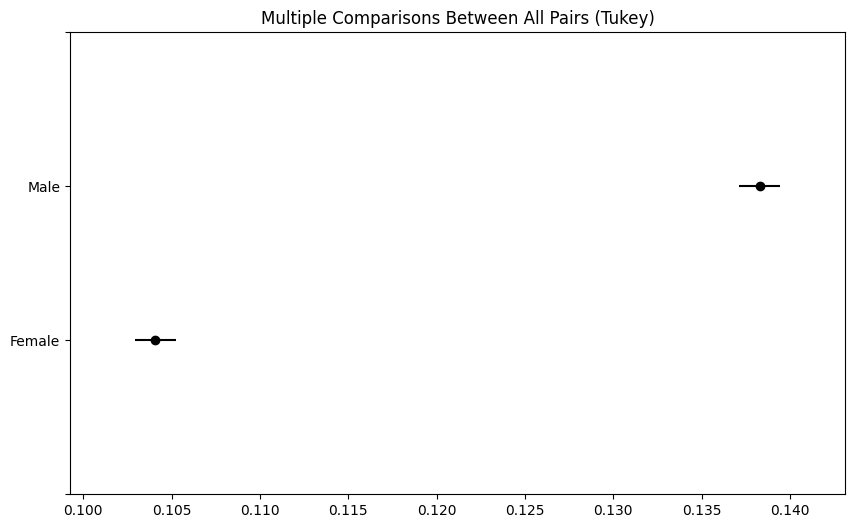

In [443]:
import matplotlib.pyplot as plt

r.plot_simultaneous()
plt.show()

#### 데이터 전처리

In [444]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [445]:
dfX.head(2)

,ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,Female,23,1,8.0000,0,< 1 Year,Yes,"61,354.0000",152.0000,235
1,1,Male,27,1,28.0000,1,< 1 Year,No,"38,036.0000",152.0000,207


In [446]:
dfX.isna().sum()

ID                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [464]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    381109 non-null  int64   
 1   Gender                381109 non-null  int8    
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  int64   
 4   Region_Code           381109 non-null  float64 
 5   Previously_Insured    381109 non-null  int64   
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  int64   
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  float64 
 10  Vintage               381109 non-null  int64   
dtypes: category(1), float64(3), int64(6), int8(1)
memory usage: 26.9 MB


In [449]:
dfX['Gender'].value_counts()

Gender
Male      206033
Female    175076
Name: count, dtype: int64

In [452]:
dfX['Gender'] = dfX['Gender'].astype('category').cat.codes

In [453]:
dfX['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200282
< 1 Year     164885
> 2 Years     15942
Name: count, dtype: int64

In [459]:
dfX['Vehicle_Age'] = pd.Categorical(dfX['Vehicle_Age'], categories=['< 1 Year', '1-2 Year', '> 2 Years'], ordered=True)

In [475]:
dfX['Vehicle_Age'] = dfX['Vehicle_Age'].cat.codes

In [461]:
dfX['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192072
No     189037
Name: count, dtype: int64

In [463]:
dfX['Vehicle_Damage'] = dfX['Vehicle_Damage'].replace({'No':0, 'Yes':1})

#### Feature Engineering

In [465]:
dfX.columns

Index(['ID', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [466]:
x_features = ['Gender', 'Age', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', \
              'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']

In [467]:
Y.columns

Index(['ID', 'Response'], dtype='object')

In [468]:
y_feature = 'Response'

#### 모델링

In [476]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

In [477]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

In [496]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [498]:
result.sort_values(['Train_Accuracy', 'DIFF', 'Test_Accuracy'], ascending=[False, True, False])

,Train_Accuracy,Test_Accuracy,DIFF,ROC_AUC
DecisionTreeClassifier,0.9999,0.8225,0.1774,0.6020
RandomForestClassifier,0.9999,0.8674,0.1325,0.8340
KNeighborsClassifier,0.8851,0.8592,0.0260,0.5962
XGBClassifier,0.8823,0.8767,0.0056,0.8560
RandomForestClassifier_9,0.8774,0.8774,0.0000,0.8547
LogisticRegression,0.8774,0.8774,0.0000,0.5981
RandomForestClassifier_1,0.8774,0.8774,0.0000,0.8166
RandomForestClassifier_2,0.8774,0.8774,0.0000,0.8291
RandomForestClassifier_3,0.8774,0.8774,0.0000,0.8395
RandomForestClassifier_4,0.8774,0.8774,0.0000,0.8447


In [500]:
model = RandomForestClassifier(random_state=1234).fit(xtrain, ytrain)

In [501]:
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True))

Train_Accuracy   0.9999
Test_Accuracy    0.8674
ROC_AUC          0.8340
dtype: float64


Y_pred = model.predict(X_submissionF)

In [531]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance'])

,Importance
Gender,0.0138
Age,0.1423
Driving_License,0.0005
Region_Code,0.1130
Previously_Insured,0.0560
Vehicle_Age,0.0223
Vehicle_Damage,0.0693
Annual_Premium,0.2441
Policy_Sales_Channel,0.0676
Vintage,0.2712


In [505]:
submission = pd.DataFrame({'ID': X_submission['ID'], \
                          'Response': Y_pred})
submission.head(2)

,ID,Response
0,17,0
1,19,0


In [506]:
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교 (Accuracy Score)

In [509]:
Y_actual = Y_submission
Y_actual.head(2)

,ID,Response
0,17,0
1,19,0


In [510]:
Y_prediction = pd.read_csv('./submission.csv')
Y_prediction.head(2)

,ID,Response
0,17,0
1,19,0


In [511]:
accuracy_score(Y_actual['Response'],Y_prediction['Response'])

0.9596179580698486

In [512]:
precision_score(Y_actual['Response'],Y_prediction['Response'])

0.9247716281569048

In [513]:
recall_score(Y_actual['Response'],Y_prediction['Response'])

0.7321846415656244

In [514]:
f1_score(Y_actual['Response'],Y_prediction['Response'])

0.817286002611896

### 비행탑승 경험 만족도 데이터

```{attention}    
데이터 설명 : 비행탑승 경험 만족도 (satisfaction 컬럼 : 'neutral or dissatisfied' or satisfied )   (83123, 24) shape     
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_test.csv    
데이터 출처 :https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv (참고, 데이터 수정)  
```  

```{attention}    
**test 데이터에 대해서 neutral or dissatisfied라고 예측할 확률을 구하고 그 확률 값을 제출하라**
```  

In [127]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv")
Y_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/y_test.csv")

X.drop(columns='id', inplace=True)
X_submission.drop(columns='id', inplace=True)

display(X.head())
display(Y.head())

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,1,5,4,4,5,5,3,5,3,5,3,47,22.0000
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,4,4,4,4,4,3,3,4,4,4,4,5,2.0000
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,4,2,4,5,1,1,1,1,5,1,4,54,46.0000
3,4,Male,Loyal Customer,35,Business travel,Eco Plus,106,5,4,4,4,5,5,5,5,2,1,5,4,4,5,130,121.0000
4,5,Female,Loyal Customer,9,Business travel,Business,2917,3,3,3,3,4,4,4,4,4,4,5,4,3,4,0,0.0000


,ID,satisfaction
0,0,neutral or dissatisfied
1,2,neutral or dissatisfied
2,3,satisfied
3,4,satisfied
4,5,satisfied


#### EDA

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [129]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

In [130]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            83123 non-null  int64 
 1   satisfaction  83123 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [131]:
Y['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    47103
satisfied                  36020
Name: count, dtype: int64

In [132]:
features = X.select_dtypes(include='object').columns
features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [133]:
for feature in features:
    print(f'{feature}')
    print(X[feature].value_counts())
    print("-" * 30)

Gender
Gender
Female    42284
Male      40839
Name: count, dtype: int64
------------------------------
Customer Type
Customer Type
Loyal Customer       67951
disloyal Customer    15172
Name: count, dtype: int64
------------------------------
Type of Travel
Type of Travel
Business travel    57370
Personal Travel    25753
Name: count, dtype: int64
------------------------------
Class
Class
Business    39791
Eco         37349
Eco Plus     5983
Name: count, dtype: int64
------------------------------


In [134]:
dfXY = pd.merge(X, Y, on='ID')
dfXY.head(2)

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,1,5,4,4,5,5,3,5,3,5,3,47,22.0000,neutral or dissatisfied
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,4,4,4,4,4,3,3,4,4,4,4,5,2.0000,neutral or dissatisfied


In [135]:
print([x.shape for x in [X, Y, dfXY]])

[(83123, 23), (83123, 2), (83123, 24)]


In [136]:
dfXY['satisfaction'] = LabelEncoder().fit_transform(dfXY['satisfaction'])

In [137]:
dfXY.corr(numeric_only=True)['satisfaction'].sort_values(ascending=False)

satisfaction                         1.0000
Online boarding                      0.5041
Inflight entertainment               0.3998
Seat comfort                         0.3530
On-board service                     0.3233
Leg room service                     0.3127
Cleanliness                          0.3061
Flight Distance                      0.3004
Inflight wifi service                0.2812
Baggage handling                     0.2467
Inflight service                     0.2449
Checkin service                      0.2350
Food and drink                       0.2107
Ease of Online booking               0.1694
Age                                  0.1390
ID                                   0.0054
Gate location                       -0.0020
Departure Delay in Minutes          -0.0531
Departure/Arrival time convenient   -0.0535
Arrival Delay in Minutes            -0.0600
Name: satisfaction, dtype: float64

In [138]:
for feature in features:
    print(f'{feature}')
    print(dfXY.groupby('satisfaction')[feature].value_counts(normalize=True))
    print("-" * 30)

Gender
satisfaction  Gender
0             Female   0.5129
              Male     0.4871
1             Female   0.5032
              Male     0.4968
Name: proportion, dtype: float64
------------------------------
Customer Type
satisfaction  Customer Type    
0             Loyal Customer      0.7533
              disloyal Customer   0.2467
1             Loyal Customer      0.9014
              disloyal Customer   0.0986
Name: proportion, dtype: float64
------------------------------
Type of Travel
satisfaction  Type of Travel 
0             Business travel   0.5088
              Personal Travel   0.4912
1             Business travel   0.9274
              Personal Travel   0.0726
Name: proportion, dtype: float64
------------------------------
Class
satisfaction  Class   
0             Eco        0.6461
              Business   0.2583
              Eco Plus   0.0956
1             Business   0.7669
              Eco        0.1920
              Eco Plus   0.0411
Name: proportion, dtype: flo

#### 데이터전처리

In [139]:
X.isna().sum()

ID                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             256
dtype: int64

In [140]:
X['Arrival Delay in Minutes'].mean()

15.132477343212617

In [141]:
X_submission.isna().sum()

ID                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             72
dtype: int64

In [142]:
X_submission['Arrival Delay in Minutes'].mean()

14.99449514703752

In [143]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [165]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int8   
 2   Customer Type                      103904 non-null  int32  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [164]:
dfX.isna().sum()

ID                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Business                             0
Eco                                  0
Eco Plus                             0
dtype: int64

In [146]:
for feature in features:
    print(dfX.groupby(feature)['Arrival Delay in Minutes'].mean())
    print('-' * 30)

Gender
Female   15.0614
Male     15.1499
Name: Arrival Delay in Minutes, dtype: float64
------------------------------
Customer Type
Loyal Customer      15.0020
disloyal Customer   15.5653
Name: Arrival Delay in Minutes, dtype: float64
------------------------------
Type of Travel
Business travel   15.3216
Personal Travel   14.6217
Name: Arrival Delay in Minutes, dtype: float64
------------------------------
Class
Business   14.5041
Eco        15.5750
Eco Plus   16.1626
Name: Arrival Delay in Minutes, dtype: float64
------------------------------


In [147]:
dfX.loc[dfX['Class'] == 'Business', 'Arrival Delay in Minutes'].mean()

14.50408455533816

In [148]:
dfX.loc[dfX['Class'] == 'Business', 'Arrival Delay in Minutes'] = \
dfX.loc[dfX['Class'] == 'Business', 'Arrival Delay in Minutes'].fillna( \
  dfX.loc[dfX['Class'] == 'Business', 'Arrival Delay in Minutes'].mean())

In [149]:
dfX.loc[dfX['Class'] == 'Eco', 'Arrival Delay in Minutes'] = \
dfX.loc[dfX['Class'] == 'Eco', 'Arrival Delay in Minutes'].fillna( \
  dfX.loc[dfX['Class'] == 'Eco', 'Arrival Delay in Minutes'].mean())

In [150]:
dfX.loc[dfX['Class'] == 'Eco Plus', 'Arrival Delay in Minutes'] = \
dfX.loc[dfX['Class'] == 'Eco Plus', 'Arrival Delay in Minutes'].fillna( \
  dfX.loc[dfX['Class'] == 'Eco Plus', 'Arrival Delay in Minutes'].mean())

In [151]:
for feature in features:
    print(f'{feature:20s} - {dfX[feature].unique()}')

Gender               - ['Female' 'Male']
Customer Type        - ['Loyal Customer' 'disloyal Customer']
Type of Travel       - ['Personal Travel' 'Business travel']
Class                - ['Eco' 'Business' 'Eco Plus']


In [152]:
dfX['Gender'] = dfX['Gender'].astype('category').cat.codes

In [153]:
dfX['Customer Type'] = LabelEncoder().fit_transform(dfX['Customer Type'])

In [154]:
dfX['Type of Travel'] = LabelEncoder().fit_transform(dfX['Type of Travel'])

In [155]:
temp = pd.get_dummies(dfX['Class'])
dfX.drop(columns=['Class'], inplace=True)
dfX = pd.concat([dfX, temp], axis=1)

In [158]:
Y['satisfaction'] = Y['satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied':0})

In [159]:
dfXY = pd.merge(dfX, Y, on='ID')

In [160]:
dfXY.corr(numeric_only=True)['satisfaction'].sort_values(ascending=False)

satisfaction                         1.0000
Eco                                  0.4524
Type of Travel                       0.4486
Customer Type                        0.1900
Eco Plus                             0.1043
Arrival Delay in Minutes             0.0600
Departure/Arrival time convenient    0.0535
Departure Delay in Minutes           0.0531
Gate location                        0.0020
ID                                  -0.0054
Gender                              -0.0097
Age                                 -0.1390
Ease of Online booking              -0.1694
Food and drink                      -0.2107
Checkin service                     -0.2350
Inflight service                    -0.2449
Baggage handling                    -0.2467
Inflight wifi service               -0.2812
Flight Distance                     -0.3004
Cleanliness                         -0.3061
Leg room service                    -0.3127
On-board service                    -0.3233
Seat comfort                    

#### Feature Engineering

In [166]:
x_features = ['Gender', 'Customer Type', 'Age', 'Type of Travel','Flight Distance', 'Inflight wifi service', \
              'Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', \
              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', \
              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness', 'Departure Delay in Minutes', \
              'Arrival Delay in Minutes', 'Business', 'Eco', 'Eco Plus']
y_feature = 'satisfaction'

#### 모델링

In [167]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

[(83123, 23), (83123, 2), (20781, 23)]
[(83123, 24), (83123,), (20781, 24)]


In [168]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

print([x.shape for x in [xtrain, ytrain, xtest, ytest]])

[(58186, 24), (58186,), (24937, 24), (24937,)]


In [176]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [178]:
result.sort_values(['Test_Accuracy', 'ROC_AUC'], ascending=[False, False])

,Train_Accuracy,Test_Accuracy,DIFF,ROC_AUC
RandomForestClassifier,1.0000,0.9623,0.0377,0.9935
XGBClassifier,0.9802,0.9609,0.0192,0.9945
DecisionTreeClassifier,1.0000,0.9425,0.0575,0.9423
LogisticRegression,0.8763,0.8734,0.0030,0.9266
KNeighborsClassifier,0.8231,0.7354,0.0878,0.7872


In [180]:
model = RandomForestClassifier(random_state=1234).fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True))

Train_Accuracy   1.0000
Test_Accuracy    0.9623
ROC_AUC          0.9935
dtype: float64


In [194]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']) \
   .sort_values('Importance', ascending=False)

,Importance
Online boarding,0.1519
Inflight wifi service,0.1368
Type of Travel,0.0858
Business,0.0828
Inflight entertainment,0.0524
Eco,0.0502
Seat comfort,0.0498
Ease of Online booking,0.0395
Flight Distance,0.0377
Leg room service,0.0351


In [182]:
Y_pred = model.predict_proba(X_submissionF)[:,1]

submission = pd.DataFrame({'ID': X_submission['ID'], \
                           'satisfaction': Y_pred})

submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교 (ROC AUC Score)

In [183]:
Y_actual = Y_submission
Y_predict = pd.read_csv('./submission.csv')

In [187]:
Y_actual['satisfaction'] = Y_actual['satisfaction'].replace({'neutral or dissatisfied': 1, 'satisfied':0})

In [188]:
Y_actual.head(2)

,ID,satisfaction
0,1,1
1,16,1


In [189]:
Y_predict.head(2)

,ID,satisfaction
0,1,0.8200
1,16,0.9700


In [190]:
roc_auc_score(Y_actual[y_feature], Y_predict[y_feature])

0.9991164455174786

### 수질 음용성 여부 데이터

```{attention} 
데이터 설명 : 수질 음용성 여부 (Potablillity 컬럼 : 0 ,1 )     
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/y_test.csv    
데이터 출처 :https://www.kaggle.com/adityakadiwal/water-potability    
```  

In [197]:
import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/waters/y_test.csv")

display(X.head())
display(Y.head())

,ID,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,8.6627,173.5319,"20,333.0795",5.6364,439.7879,459.6331,16.2833,89.9243,5.1201
1,1,NaN,226.2708,"15,380.1241",6.6615,NaN,392.5582,14.0831,50.2864,4.5169
2,2,7.5838,217.2833,"36,343.4071",8.5327,375.9644,393.8777,17.4423,77.7223,3.6423
3,3,6.5848,182.3755,"24,723.1063",6.2389,NaN,414.3508,17.5826,78.2137,4.4041
4,4,7.1799,180.8542,"10,859.5538",8.2635,341.3025,358.0563,12.0653,83.3299,3.8784


,ID,Potability
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0


#### EDA

In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2620 non-null   int64  
 1   ph               2225 non-null   float64
 2   Hardness         2620 non-null   float64
 3   Solids           2620 non-null   float64
 4   Chloramines      2620 non-null   float64
 5   Sulfate          2003 non-null   float64
 6   Conductivity     2620 non-null   float64
 7   Organic_carbon   2620 non-null   float64
 8   Trihalomethanes  2488 non-null   float64
 9   Turbidity        2620 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [199]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               656 non-null    int64  
 1   ph               549 non-null    float64
 2   Hardness         656 non-null    float64
 3   Solids           656 non-null    float64
 4   Chloramines      656 non-null    float64
 5   Sulfate          504 non-null    float64
 6   Conductivity     656 non-null    float64
 7   Organic_carbon   656 non-null    float64
 8   Trihalomethanes  618 non-null    float64
 9   Turbidity        656 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 51.4 KB


In [200]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          2620 non-null   int64
 1   Potability  2620 non-null   int64
dtypes: int64(2)
memory usage: 41.1 KB


In [201]:
X.select_dtypes(include='object').columns

Index([], dtype='object')

In [204]:
dfXY = pd.merge(X, Y, on='ID')

In [209]:
dfXY.corr()['Potability'].sort_values(ascending=False)

Potability         1.0000
Solids             0.0190
ph                 0.0178
Conductivity       0.0141
ID                 0.0100
Chloramines        0.0055
Trihalomethanes    0.0012
Turbidity         -0.0043
Hardness          -0.0106
Organic_carbon    -0.0285
Sulfate           -0.0437
Name: Potability, dtype: float64

#### 데이터전처리

In [210]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=False)

In [230]:
dfX.isna().sum()

ID                 0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [212]:
dfX['ph'].value_counts()

ph
6.9870    2
6.9534    2
7.5357    2
4.3283    2
8.4379    2
         ..
7.7540    1
8.0821    1
7.0318    1
7.1190    1
7.9331    1
Name: count, Length: 2225, dtype: int64

In [215]:
X['ph'].mean(), X_submission['ph'].mean(), X['ph'].median(), X_submission['ph'].median()

(7.059706555058334, 7.109372787913072, 7.025504334993, 7.061845519716819)

In [217]:
dfX['ph'] = dfX['ph'].fillna(dfX['ph'].mean())

In [219]:
dfX['Sulfate'].value_counts()

Sulfate
380.0782    2
371.2838    2
311.7949    2
316.8202    2
327.6975    2
           ..
336.4660    1
395.4960    1
351.5733    1
418.2472    1
331.0872    1
Name: count, Length: 2003, dtype: int64

In [224]:
X['Sulfate'].mean(), X_submission['Sulfate'].mean(), dfX['Sulfate'].mean(), \
X['Sulfate'].median(), X_submission['Sulfate'].median(), dfX['Sulfate'].median()

(333.1284518718297,
 335.1351121171081,
 333.5318650204617,
 332.2393594928603,
 333.3154288686785,
 332.7445191883906)

In [225]:
dfX['Sulfate'] = dfX['Sulfate'].fillna(dfX['Sulfate'].mean())

In [227]:
dfX['Trihalomethanes'].value_counts()

Trihalomethanes
54.0609    2
44.7890    2
35.2212    2
62.2977    2
46.5046    2
          ..
88.0490    1
45.7213    1
70.3684    1
86.9797    1
55.4041    1
Name: count, Length: 2488, dtype: int64

In [228]:
X['Trihalomethanes'].mean(), X_submission['Trihalomethanes'].mean(), dfX['Trihalomethanes'].mean(), \
X['Trihalomethanes'].median(), X_submission['Trihalomethanes'].median(), dfX['Trihalomethanes'].median()

(66.36231333912505,
 66.34604182323474,
 66.35907579990412,
 66.36358047027184,
 65.81625396036834,
 66.23041500603713)

In [229]:
dfX['Trihalomethanes'] = dfX['Trihalomethanes'].fillna(dfX['Trihalomethanes'].mean())

In [231]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276 entries, 0 to 655
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3276 non-null   int64  
 1   ph               3276 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          3276 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3276 non-null   float64
 9   Turbidity        3276 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [234]:
dfXY = pd.merge(dfX, Y, on='ID')

In [236]:
dfXY.corr()['Potability']

ID                 0.0100
ph                 0.0164
Hardness          -0.0106
Solids             0.0190
Chloramines        0.0055
Sulfate           -0.0384
Conductivity       0.0141
Organic_carbon    -0.0285
Trihalomethanes    0.0012
Turbidity         -0.0043
Potability         1.0000
Name: Potability, dtype: float64

#### Feature Engineering

In [238]:
x_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate','Conductivity', \
              'Organic_carbon', 'Trihalomethanes', 'Turbidity']
y_feature = 'Potability'

#### 모델링

In [239]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

[(2620, 10), (2620, 2), (656, 10)]
[(2620, 9), (2620,), (656, 9)]


In [240]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=0, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(1834, 9), (786, 9), (1834,), (786,)]


In [246]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


In [247]:
result.sort_values(['Accuracy'], ascending=[False])

,Train_Accuracy,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
XGBClassifier,1.0000,0.6183,0.3817,0.6183,0.5148,0.3974,0.4485
RandomForestClassifier,0.7137,0.6145,0.0992,0.6145,0.5345,0.1010,0.1699
DecisionTreeClassifier,1.0000,0.5700,0.4300,0.5700,0.4543,0.5016,0.4768
KNeighborsClassifier,0.7050,0.5611,0.1439,0.5611,0.4159,0.3062,0.3527


In [249]:
model = RandomForestClassifier(random_state=1234, criterion='gini', max_depth=7, n_estimators=300).fit(xtrain, ytrain)
get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False)

Train_Accuracy   0.7137
Test_Accuracy    0.6145
Accuracy         0.6145
Precision        0.5345
Recall           0.1010
F1               0.1699
dtype: float64

In [251]:
model = XGBClassifier().fit(xtrain, ytrain)
get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False)

Train_Accuracy   1.0000
Test_Accuracy    0.6183
Accuracy         0.6183
Precision        0.5148
Recall           0.3974
F1               0.4485
dtype: float64

In [265]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance'])

,Importance
ph,0.1202
Hardness,0.1086
Solids,0.1120
Chloramines,0.1187
Sulfate,0.1607
Conductivity,0.0939
Organic_carbon,0.1006
Trihalomethanes,0.0938
Turbidity,0.0915


In [254]:
Y_pred = model.predict(X_submissionF)

submission = pd.DataFrame({'ID': X_submission['ID'], 'Potability': Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교 (Accuracy Score)

In [255]:
Y_predict = pd.read_csv('./submission.csv')

display(Y_actual.head(2))
display(Y_predict.head(2))

,ID,Potability
0,16,0
1,20,1


,ID,Potability
0,16,1
1,20,1


In [256]:
accuracy_score(Y_actual[y_feature], Y_predict[y_feature])

0.8765243902439024

In [257]:
precision_score(Y_actual[y_feature], Y_predict[y_feature])

0.8594377510040161

In [259]:
recall_score(Y_actual[y_feature], Y_predict[y_feature])

0.823076923076923

In [260]:
f1_score(Y_actual[y_feature], Y_predict[y_feature])

0.8408644400785854

In [262]:
pd.DataFrame(confusion_matrix(Y_actual[y_feature], Y_predict[y_feature]), \
             index=[0, 1], columns=[0, 1])

,0,1
0,361,35
1,46,214


### 약물 분류 데이터

```{attention}  
데이터 설명 : 투약하는 약을 분류  (종속변수 :Drug)   
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_test.csv    
데이터 출처 :https://www.kaggle.com/prathamtripathi/drug-classification(참고, 데이터 수정)   
```  

In [3]:
import pandas as pd

X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_test.csv")

display(X.head())
display(Y.head())

,ID,Age,Sex,BP,Cholesterol,Na_to_K
0,0,36,F,NORMAL,HIGH,16.753
1,1,47,F,LOW,HIGH,11.767
2,2,69,F,NORMAL,HIGH,10.065
3,3,35,M,LOW,NORMAL,9.170
4,4,49,M,LOW,NORMAL,11.014


,ID,Drug
0,0,0
1,1,3
2,2,4
3,3,4
4,4,4


#### EDA

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           157 non-null    int64  
 1   Age          157 non-null    int64  
 2   Sex          157 non-null    object 
 3   BP           157 non-null    object 
 4   Cholesterol  157 non-null    object 
 5   Na_to_K      157 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.5+ KB


In [6]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           43 non-null     int64  
 1   Age          43 non-null     int64  
 2   Sex          43 non-null     object 
 3   BP           43 non-null     object 
 4   Cholesterol  43 non-null     object 
 5   Na_to_K      43 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB


In [7]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      157 non-null    int64
 1   Drug    157 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


In [47]:
dfXY = pd.merge(X, Y, on='ID')

In [48]:
dfXY.head(2)

,ID,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,36,F,NORMAL,HIGH,16.7530,0
1,1,47,F,LOW,HIGH,11.7670,3


In [49]:
dfXY.corr(numeric_only=True)['Drug']

ID        -0.0721
Age        0.0574
Na_to_K   -0.7041
Drug       1.0000
Name: Drug, dtype: float64

In [50]:
features = X.select_dtypes(include='object').columns
features

Index(['Sex', 'BP', 'Cholesterol'], dtype='object')

In [52]:
dfXY['Drug'].value_counts(normalize=True)

0   0.4586
4   0.2739
1   0.1146
3   0.0764
2   0.0764
Name: Drug, dtype: float64

In [16]:
for feature in features:
    print(f'{feature}')
    print(dfXY.groupby('Drug')[feature].value_counts(normalize=True))
    print('-' * 30)

Sex
Drug  Sex
0     F      0.513889
      M      0.486111
1     M      0.611111
      F      0.388889
2     M      0.583333
      F      0.416667
3     M      0.750000
      F      0.250000
4     M      0.534884
      F      0.465116
Name: Sex, dtype: float64
------------------------------
BP
Drug  BP    
0     HIGH      0.472222
      LOW       0.277778
      NORMAL    0.250000
1     HIGH      1.000000
2     HIGH      1.000000
3     LOW       1.000000
4     NORMAL    0.651163
      LOW       0.348837
Name: BP, dtype: float64
------------------------------
Cholesterol
Drug  Cholesterol
0     NORMAL         0.513889
      HIGH           0.486111
1     HIGH           0.500000
      NORMAL         0.500000
2     HIGH           0.500000
      NORMAL         0.500000
3     HIGH           1.000000
4     NORMAL         0.651163
      HIGH           0.348837
Name: Cholesterol, dtype: float64
------------------------------


#### 데이터전처리

In [17]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           200 non-null    int64  
 1   Age          200 non-null    int64  
 2   Sex          200 non-null    object 
 3   BP           200 non-null    object 
 4   Cholesterol  200 non-null    object 
 5   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [18]:
dfX.isna().sum()

ID             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [19]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} = {dfX[feature].unique()}')

Sex = ['F' 'M']
BP = ['NORMAL' 'LOW' 'HIGH']
Cholesterol = ['HIGH' 'NORMAL']


In [21]:
dfX['Sex'] = dfX['Sex'].replace({'F': 0, 'M': 1})

In [24]:
temp = dfX.drop(columns='BP')
dfX = pd.concat([temp, pd.get_dummies(dfX['BP'], prefix='BP')], axis=1)
dfX.head(2)

,ID,Age,Sex,Cholesterol,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL
0,0,36,0,HIGH,16.753,0,0,1
1,1,47,0,HIGH,11.767,0,1,0


In [25]:
temp = dfX.drop(columns='Cholesterol')
dfX = pd.concat([temp, pd.get_dummies(dfX['Cholesterol'], prefix='Cholesterol')], axis=1)
dfX.head(2)

,ID,Age,Sex,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,0,36,0,16.753,0,0,1,1,0
1,1,47,0,11.767,0,1,0,1,0


In [26]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  200 non-null    int64  
 1   Age                 200 non-null    int64  
 2   Sex                 200 non-null    int64  
 3   Na_to_K             200 non-null    float64
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 7.4 KB


In [33]:
dfXY = pd.merge(dfX, Y, on='ID')

In [34]:
dfXY.corr()['Drug']

ID                   -0.0721
Age                   0.0574
Sex                   0.0643
Na_to_K              -0.7041
BP_HIGH              -0.4518
BP_LOW                0.1712
BP_NORMAL             0.3155
Cholesterol_HIGH     -0.0416
Cholesterol_NORMAL    0.0416
Drug                  1.0000
Name: Drug, dtype: float64

#### Feature Engineering

In [32]:
dfX.columns

Index(['ID', 'Age', 'Sex', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

In [35]:
Y.columns

Index(['ID', 'Drug'], dtype='object')

In [37]:
x_features = ['Age', 'Sex', 'Na_to_K', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL','Cholesterol_HIGH', 'Cholesterol_NORMAL']
y_feature = 'Drug'

#### 모델링

In [39]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

[(157, 6), (157, 2), (43, 6)]
[(157, 8), (157,), (43, 8)]


In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(109, 8), (48, 8), (109,), (48,)]


In [54]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

In [56]:
result.sort_values(['Accuracy', 'Precision', 'Recall', 'F1'], ascending=False)

,Train_Accuracy,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
RandomForestClassifier,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
XGBClassifier,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
KNeighborsClassifier,0.7890,0.6250,0.1640,0.6250,0.6118,0.6250,0.6100


In [57]:
model = DecisionTreeClassifier(random_state=1234).fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False))

Train_Accuracy   1.0000
Test_Accuracy    1.0000
Accuracy         1.0000
Precision        1.0000
Recall           1.0000
F1               1.0000
dtype: float64


In [59]:
Y_pred = model.predict(X_submissionF)

submission = pd.DataFrame({'ID': X_submission['ID'], 
                           'Drug': Y_pred})
submission.to_csv('./submission.csv', index=False)
submission.head(2)

,ID,Drug
0,8,0
1,9,4


In [61]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
Na_to_K,0.4844
BP_HIGH,0.2154
Age,0.1319
Cholesterol_NORMAL,0.1128
BP_LOW,0.0554
Sex,0.0000
BP_NORMAL,0.0000
Cholesterol_HIGH,0.0000


#### 실제값과 비교 (Accuracy, Precision, Recall, F1 Score)

In [62]:
Y_predict = pd.read_csv('./submission.csv')
display(Y_actual.head())
display(Y_predict.head())

,ID,Drug
0,8,0
1,9,4
2,14,1
3,25,4
4,26,0


,ID,Drug
0,8,0
1,9,4
2,14,1
3,25,4
4,26,0


In [65]:
pd.DataFrame(confusion_matrix(Y_actual['Drug'], Y_predict['Drug']), index=range(0,5), columns=range(0,5))

,0,1,2,3,4
0,15,0,0,0,0
1,0,7,0,0,0
2,0,0,5,0,0
3,0,0,0,3,0
4,0,0,0,0,13


In [81]:
print(f'Accuracy  Score: {accuracy_score(Y_actual.Drug, Y_predict.Drug):.4f}')
print(f'Precision Score: {precision_score(Y_actual.Drug, Y_predict.Drug, average="macro"):.4f}')
print(f'Recall    Score: {recall_score(Y_actual.Drug, Y_predict.Drug, average="macro"):.4f}')
print(f'F1        Score: {f1_score(Y_actual.Drug, Y_predict.Drug, average="macro"):.4f}')

Accuracy  Score: 1.0000
Precision Score: 1.0000
Recall    Score: 1.0000
F1        Score: 1.0000


### 사기회사 분류 데이터

```{attention} 
데이터 설명 : 사기회사 분류  (종속변수 : Risk 1: 사기 , 0 : 정상)     
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/y_test.csv    
데이터 출처 :https://www.kaggle.com/sid321axn/audit-data(참고, 데이터 수정)    
```  

In [7]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/audit/y_test.csv")

display(X.head())
display(Y.head())

,ID,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,0,2.3700,16,0.0100,0.2000,0.0020,0.0070,0.2000,0.0014,0.0170,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.0000,1.4034,0.4000,0.5000,0.2807
1,2,55.5700,9,1.0600,0.4000,0.4240,0.0000,0.2000,0.0000,1.0600,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.2000,1.8240,0.4000,0.5000,0.3648
2,3,55.5700,16,2.4200,0.6000,1.4520,3.5300,0.6000,2.1180,5.9500,5.0000,0.2000,...,2.5240,2,0.2000,0.4000,0,0.2000,0.0000,3.8000,7.4940,0.4000,0.5000,1.4988
3,4,2.3700,9,0.3100,0.2000,0.0620,0.6900,0.2000,0.1380,1.0000,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.0000,1.6000,0.4000,0.5000,0.3200
4,5,55.5700,6,0.6200,0.2000,0.1240,0.4200,0.2000,0.0840,1.0400,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.0000,1.6080,0.4000,0.5000,0.3216


,ID,Risk
0,0,0
1,2,0
2,3,1
3,4,0
4,5,0


#### EDA

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              620 non-null    int64  
 1   Sector_score    620 non-null    float64
 2   LOCATION_ID     620 non-null    object 
 3   PARA_A          620 non-null    float64
 4   Score_A         620 non-null    float64
 5   Risk_A          620 non-null    float64
 6   PARA_B          620 non-null    float64
 7   Score_B         620 non-null    float64
 8   Risk_B          620 non-null    float64
 9   TOTAL           620 non-null    float64
 10  numbers         620 non-null    float64
 11  Score_B.1       620 non-null    float64
 12  Risk_C          620 non-null    float64
 13  Money_Value     619 non-null    float64
 14  Score_MV        620 non-null    float64
 15  Risk_D          620 non-null    float64
 16  District_Loss   620 non-null    int64  
 17  PROB            620 non-null    flo

In [9]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              156 non-null    int64  
 1   Sector_score    156 non-null    float64
 2   LOCATION_ID     156 non-null    object 
 3   PARA_A          156 non-null    float64
 4   Score_A         156 non-null    float64
 5   Risk_A          156 non-null    float64
 6   PARA_B          156 non-null    float64
 7   Score_B         156 non-null    float64
 8   Risk_B          156 non-null    float64
 9   TOTAL           156 non-null    float64
 10  numbers         156 non-null    float64
 11  Score_B.1       156 non-null    float64
 12  Risk_C          156 non-null    float64
 13  Money_Value     155 non-null    float64
 14  Score_MV        156 non-null    float64
 15  Risk_D          156 non-null    float64
 16  District_Loss   156 non-null    int64  
 17  PROB            156 non-null    flo

In [10]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      620 non-null    int64
 1   Risk    620 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [11]:
X['LOCATION_ID'].value_counts()

LOCATION_ID
8          68
19         58
16         46
12         37
9          37
5          33
4          29
2          29
15         28
6          27
13         26
32         26
11         23
22         19
14         16
29         16
31         11
1          10
39          9
37          8
18          8
21          7
28          6
27          6
43          5
25          4
7           4
20          3
30          3
3           3
38          2
35          2
40          2
23          1
17          1
LOHARU      1
SAFIDON     1
44          1
33          1
24          1
36          1
NUH         1
Name: count, dtype: int64

In [13]:
dfXY = pd.merge(X, Y, on='ID')

In [16]:
dfXY.corr(numeric_only=True)['Risk'].sort_values(ascending=False)

Risk              1.0000
Score             0.7842
Score_MV          0.6694
Score_A           0.6428
Score_B           0.6321
RiSk_E            0.4240
District_Loss     0.4208
Risk_A            0.4180
CONTROL_RISK      0.4131
PARA_A            0.4116
Score_B.1         0.3392
Inherent_Risk     0.3364
Risk_C            0.3316
numbers           0.3230
Prob              0.2838
TOTAL             0.2674
Money_Value       0.2480
Risk_D            0.2454
PARA_B            0.2344
Risk_B            0.2325
History           0.2215
Risk_F            0.1990
Audit_Risk        0.1968
PROB              0.1653
ID               -0.0026
Sector_score     -0.4138
Detection_Risk       NaN
Name: Risk, dtype: float64

In [23]:
dfXY.groupby('Risk')['LOCATION_ID'].value_counts(normalize=True).sort_index()

Risk  LOCATION_ID
0     1             0.0053
      11            0.0372
      12            0.0665
      13            0.0505
      14            0.0293
      15            0.0532
      16            0.0691
      17            0.0027
      18            0.0186
      19            0.0691
      2             0.0213
      21            0.0133
      22            0.0266
      25            0.0080
      27            0.0133
      28            0.0080
      29            0.0239
      3             0.0053
      30            0.0027
      31            0.0186
      32            0.0505
      35            0.0027
      37            0.0080
      39            0.0027
      4             0.0559
      40            0.0027
      43            0.0133
      5             0.0745
      6             0.0638
      7             0.0027
      8             0.1037
      9             0.0691
      LOHARU        0.0027
      NUH           0.0027
      SAFIDON       0.0027
1     1             0.0328
      11  

#### 데이터전처리

In [20]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [21]:
dfX.isna().sum()

ID                0
Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       2
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [54]:
dfX.isna().sum()

ID                0
Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       2
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [27]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              776 non-null    int64  
 1   Sector_score    776 non-null    float64
 2   LOCATION_ID     776 non-null    int32  
 3   PARA_A          776 non-null    float64
 4   Score_A         776 non-null    float64
 5   Risk_A          776 non-null    float64
 6   PARA_B          776 non-null    float64
 7   Score_B         776 non-null    float64
 8   Risk_B          776 non-null    float64
 9   TOTAL           776 non-null    float64
 10  numbers         776 non-null    float64
 11  Score_B.1       776 non-null    float64
 12  Risk_C          776 non-null    float64
 13  Money_Value     774 non-null    float64
 14  Score_MV        776 non-null    float64
 15  Risk_D          776 non-null    float64
 16  District_Loss   776 non-null    int64  
 17  PROB            776 non-null    flo

In [24]:
for feature in dfX.select_dtypes(include='object').columns:
    print(feature)

LOCATION_ID


In [26]:
dfX['LOCATION_ID'] = LabelEncoder().fit_transform(dfX['LOCATION_ID'])

In [48]:
for feature in dfX.columns:
    print(f'{feature} - {sum(dfX[feature].isin([np.nan]))}')

ID - 0
Sector_score - 0
LOCATION_ID - 0
PARA_A - 0
Score_A - 0
Risk_A - 0
PARA_B - 0
Score_B - 0
Risk_B - 0
TOTAL - 0
numbers - 0
Score_B.1 - 0
Risk_C - 0
Money_Value - 2
Score_MV - 0
Risk_D - 0
District_Loss - 0
PROB - 0
RiSk_E - 0
History - 0
Prob - 0
Risk_F - 0
Score - 0
Inherent_Risk - 0
CONTROL_RISK - 0
Detection_Risk - 0
Audit_Risk - 0


In [58]:
dfX[dfX['Money_Value'].isna()]

,ID,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
38,53,55.5700,30,0.2300,0.2000,0.0460,0.0000,0.2000,0.0000,0.2300,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.0000,1.4460,0.4000,0.5000,0.2892
663,219,55.5700,30,0.2300,0.2000,0.0460,0.0000,0.2000,0.0000,0.2300,5.0000,0.2000,...,0.0000,2,0.2000,0.4000,0,0.2000,0.0000,2.0000,1.4460,0.4000,0.5000,0.2892


In [63]:
dfX['Money_Value'] = dfX['Money_Value'].fillna(0)

In [64]:
dfXY = pd.merge(dfX, Y, on='ID')

In [65]:
dfXY.corr()['Risk'].sort_values(ascending=False)

Risk              1.0000
Score             0.7842
Score_MV          0.6694
Score_A           0.6428
Score_B           0.6321
RiSk_E            0.4240
District_Loss     0.4208
Risk_A            0.4180
CONTROL_RISK      0.4131
PARA_A            0.4116
Score_B.1         0.3392
Inherent_Risk     0.3364
Risk_C            0.3316
numbers           0.3230
Prob              0.2838
TOTAL             0.2674
Money_Value       0.2481
Risk_D            0.2454
PARA_B            0.2344
Risk_B            0.2325
History           0.2215
Risk_F            0.1990
Audit_Risk        0.1968
PROB              0.1653
ID               -0.0026
LOCATION_ID      -0.0895
Sector_score     -0.4138
Detection_Risk       NaN
Name: Risk, dtype: float64

#### Feature Engineering

In [66]:
x_features = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A','PARA_B', 'Score_B', \
              'Risk_B', 'TOTAL', 'numbers', 'Score_B.1','Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', \
              'District_Loss', 'PROB','RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', \
              'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk']
y_feature = 'Risk'

#### 모델링

In [67]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=False)

print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

[(620, 27), (620, 2), (156, 27)]
[(620, 26), (620,), (156, 26)]


In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(434, 26), (186, 26), (434,), (186,)]


In [69]:
import numpy as np

np.unique(xtrain)

array([0.000000e+00, 2.600000e-04, 3.000000e-04, ..., 9.615144e+02,
       1.264630e+03, 1.268910e+03])

In [70]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [73]:
result.sort_values(['ROC_AUC', 'DIFF'], ascending=[False, True])

,Train_Accuracy,Test_Accuracy,DIFF,ROC_AUC
DecisionTreeClassifier,1.0000,1.0000,0.0000,1.0000
XGBClassifier,1.0000,1.0000,0.0000,1.0000
RandomForestClassifier,1.0000,0.9946,0.0054,1.0000
LogisticRegression,0.9977,0.9946,0.0031,0.9995
KNeighborsClassifier,0.9654,0.9624,0.0031,0.9835


In [74]:
model = DecisionTreeClassifier(random_state=1234).fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True))

Train_Accuracy   1.0000
Test_Accuracy    1.0000
ROC_AUC          1.0000
dtype: float64


In [75]:
Y_pred = model.predict_proba(X_submissionF)[:,1]

submission = pd.DataFrame({'ID': X_submission['ID'], 
                           'Risk': Y_pred})
submission.to_csv('./submission.csv', index=False)

In [79]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']) \
    .sort_values('Importance', ascending=False)

,Importance
Audit_Risk,1.0000
LOCATION_ID,0.0000
Detection_Risk,0.0000
CONTROL_RISK,0.0000
Inherent_Risk,0.0000
Score,0.0000
Risk_F,0.0000
Prob,0.0000
History,0.0000
RiSk_E,0.0000


#### 실제값과 확인 (ROC AUC Score)

In [80]:
Y_predict = pd.read_csv('./submission.csv')

In [81]:
Y_actual.head(2)

,ID,Risk
0,1,1
1,9,1


In [83]:
Y_predict.head(2)

,ID,Risk
0,1,1.0000
1,9,1.0000


In [84]:
roc_auc_score(Y_actual[y_feature], Y_predict[y_feature])

1.0

### 센서데이터 동작유형 분류 데이터

```{attention} 
데이터 설명 : 센서데이터로 동작 유형 분류  (종속변수 pose : 0 ,1 구분)   
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/y_test.csv    
데이터 출처 :https://www.kaggle.com/kyr7plus/emg-4(참고, 데이터 수정)    
```  

In [86]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/x_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/muscle/y_test.csv")

display(x_train.head())
display(y_train.head())

,ID,motion_0,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,motion_7,motion_8,motion_9,motion_10,...,motion_52,motion_53,motion_54,motion_55,motion_56,motion_57,motion_58,motion_59,motion_60,motion_61,motion_62,motion_63
0,0,1.0000,-2.0000,-1.0000,4.0000,-5.0000,-4.0000,1.0000,0.0000,-15.0000,-3.0000,-1.0000,...,-8.0000,-6.0000,0.0000,-1.0000,-13.0000,-3.0000,1.0000,-1.0000,-32.0000,-22.0000,-2.0000,-3.0000
1,2,20.0000,0.0000,0.0000,1.0000,5.0000,6.0000,-52.0000,18.0000,15.0000,-5.0000,-7.0000,...,2.0000,21.0000,-70.0000,-55.0000,-38.0000,-14.0000,-12.0000,-8.0000,-34.0000,-63.0000,-87.0000,-77.0000
2,4,1.0000,-1.0000,1.0000,4.0000,-5.0000,-8.0000,1.0000,-3.0000,-14.0000,-5.0000,-3.0000,...,-43.0000,-35.0000,1.0000,12.0000,-25.0000,0.0000,0.0000,3.0000,2.0000,-27.0000,1.0000,0.0000
3,5,13.0000,2.0000,1.0000,-3.0000,1.0000,3.0000,28.0000,3.0000,12.0000,1.0000,1.0000,...,3.0000,15.0000,0.0000,-21.0000,-17.0000,-2.0000,0.0000,-4.0000,-17.0000,-21.0000,-21.0000,25.0000
4,6,-2.0000,-7.0000,-4.0000,-8.0000,16.0000,44.0000,1.0000,3.0000,-16.0000,2.0000,3.0000,...,-8.0000,11.0000,-1.0000,2.0000,-1.0000,1.0000,4.0000,4.0000,-17.0000,-38.0000,-3.0000,3.0000


,ID,pose
0,0,1
1,2,0
2,4,1
3,5,0
4,6,1


In [87]:
X = x_train.copy()
Y = y_train.copy()
X_submission = x_test.copy()
Y_actual = y_test.copy()

#### EDA

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4650 non-null   int64  
 1   motion_0   4650 non-null   float64
 2   motion_1   4650 non-null   float64
 3   motion_2   4650 non-null   float64
 4   motion_3   4650 non-null   float64
 5   motion_4   4650 non-null   float64
 6   motion_5   4650 non-null   float64
 7   motion_6   4650 non-null   float64
 8   motion_7   4650 non-null   float64
 9   motion_8   4650 non-null   float64
 10  motion_9   4650 non-null   float64
 11  motion_10  4650 non-null   float64
 12  motion_11  4650 non-null   float64
 13  motion_12  4650 non-null   float64
 14  motion_13  4650 non-null   float64
 15  motion_14  4650 non-null   float64
 16  motion_15  4650 non-null   float64
 17  motion_16  4650 non-null   float64
 18  motion_17  4650 non-null   float64
 19  motion_18  4650 non-null   float64
 20  motion_1

In [89]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1163 non-null   int64  
 1   motion_0   1163 non-null   float64
 2   motion_1   1163 non-null   float64
 3   motion_2   1163 non-null   float64
 4   motion_3   1163 non-null   float64
 5   motion_4   1163 non-null   float64
 6   motion_5   1163 non-null   float64
 7   motion_6   1163 non-null   float64
 8   motion_7   1163 non-null   float64
 9   motion_8   1163 non-null   float64
 10  motion_9   1163 non-null   float64
 11  motion_10  1163 non-null   float64
 12  motion_11  1163 non-null   float64
 13  motion_12  1163 non-null   float64
 14  motion_13  1163 non-null   float64
 15  motion_14  1163 non-null   float64
 16  motion_15  1163 non-null   float64
 17  motion_16  1163 non-null   float64
 18  motion_17  1163 non-null   float64
 19  motion_18  1163 non-null   float64
 20  motion_1

In [90]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      4650 non-null   int64
 1   pose    4650 non-null   int64
dtypes: int64(2)
memory usage: 72.8 KB


#### 데이터 전처리

In [95]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [97]:
dfX.isna().sum().sum()

0

In [98]:
dfX.isnull().sum().sum()

0

In [99]:
dfX.select_dtypes(include='object').columns

Index([], dtype='object')

#### Feature Engineering

In [91]:
dfXY = pd.merge(X, Y, on='ID')

In [94]:
dfXY.corr(numeric_only=True)['pose'].sort_values(ascending=True).head()

motion_5    -0.0226
motion_29   -0.0207
motion_28   -0.0191
motion_4    -0.0184
motion_17   -0.0173
Name: pose, dtype: float64

In [103]:
x_features = ['motion_0', 'motion_1', 'motion_2', 'motion_3', 'motion_4','motion_5', 'motion_6', 'motion_7', \
              'motion_8', 'motion_9', 'motion_10','motion_11', 'motion_12', 'motion_13', 'motion_14', 'motion_15', \
              'motion_16', 'motion_17', 'motion_18', 'motion_19', 'motion_20','motion_21', 'motion_22', \
              'motion_23', 'motion_24', 'motion_25','motion_26', 'motion_27', 'motion_28', 'motion_29', \
              'motion_30','motion_31', 'motion_32', 'motion_33', 'motion_34', 'motion_35','motion_36', \
              'motion_37', 'motion_38', 'motion_39', 'motion_40','motion_41', 'motion_42', 'motion_43', \
              'motion_44', 'motion_45','motion_46', 'motion_47', 'motion_48', 'motion_49', 'motion_50', \
              'motion_51', 'motion_52', 'motion_53', 'motion_54', 'motion_55','motion_56', 'motion_57', \
              'motion_58', 'motion_59', 'motion_60','motion_61', 'motion_62', 'motion_63']
y_feature = 'pose'

#### 모델링

In [104]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=True)

print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

[(4650, 65), (4650, 2), (1163, 65)]
[(4650, 64), (4650,), (1163, 64)]


In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(3255, 64), (1395, 64), (3255,), (1395,)]


In [107]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=False)

In [109]:
result.sort_values(['Recall'], ascending=[False])

,Train_Accuracy,Test_Accuracy,DIFF,Accuracy,Precision,Recall,F1
XGBClassifier,1.0000,0.9978,0.0022,0.9978,0.9979,0.9978,0.9978
RandomForestClassifier,1.0000,0.9971,0.0029,0.9971,0.9971,0.9971,0.9971
DecisionTreeClassifier,1.0000,0.9692,0.0308,0.9692,0.9692,0.9692,0.9692
KNeighborsClassifier,0.9287,0.8953,0.0334,0.8953,0.9135,0.8953,0.8942


In [110]:
model = XGBClassifier().fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=False))

Train_Accuracy   1.0000
Test_Accuracy    0.9978
Accuracy         0.9978
Precision        0.9979
Recall           0.9978
F1               0.9978
dtype: float64


In [113]:
Y_pred = model.predict(X_submissionF)

submission = pd.DataFrame({'ID': X_submission['ID'], \
                           y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 확인 (Recall Score)

In [120]:
Y_predict = pd.read_csv('./submission.csv')

In [122]:
Y_actual.head()

,ID,pose
0,1,1
1,3,1
2,8,1
3,10,1
4,17,0


In [123]:
Y_predict.head()

,ID,pose
0,1,1
1,3,1
2,8,1
3,10,1
4,17,0


In [129]:
print(f'{"Accuracy":15s} : {accuracy_score(Y_actual[y_feature], Y_predict[y_feature]):,.4f}')
print(f'{"Precision":15s} : {precision_score(Y_actual[y_feature], Y_predict[y_feature]):,.4f}')
print(f'{"Recall":15s} : {recall_score(Y_actual[y_feature], Y_predict[y_feature]):,.4f}')
print(f'{"F1":15s} : {f1_score(Y_actual[y_feature], Y_predict[y_feature]):,.4f}')

Accuracy        : 1.0000
Precision       : 1.0000
Recall          : 1.0000
F1              : 1.0000


In [132]:
pd.DataFrame(confusion_matrix(Y_actual[y_feature], Y_predict[y_feature]), index=[0, 1], columns=[0, 1])

,0,1
0,609,0
1,0,554


### 당뇨여부판단 데이터

```{attention}  
데이터 설명 :  당뇨여부 판단하기 (종속변수 Outcome : 1 당뇨 , 0 :정상)         
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv    
데이터 출처 :https://www.kaggle.com/pritsheta/diabetes-dataset(참고, 데이터 수정)    
```  

In [133]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/x_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/diabetes/y_test.csv  ")

display(x_train.head())
display(y_train.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,8,126,88,36,108,38.5000,0.3490,49
1,1,0,74,52,10,36,27.8000,0.2690,22
2,2,1,140,74,26,180,24.1000,0.8280,23
3,3,6,162,62,0,0,24.3000,0.1780,50
4,4,2,94,68,18,76,26.0000,0.5610,21


,ID,Outcome
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [134]:
X = x_train.copy()
Y = y_train.copy()
X_submission = x_test.copy()
Y_actual = y_test.copy()

#### EDA

In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [136]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        154 non-null    int64  
 1   Pregnancies               154 non-null    int64  
 2   Glucose                   154 non-null    int64  
 3   BloodPressure             154 non-null    int64  
 4   SkinThickness             154 non-null    int64  
 5   Insulin                   154 non-null    int64  
 6   BMI                       154 non-null    float64
 7   DiabetesPedigreeFunction  154 non-null    float64
 8   Age                       154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [137]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       614 non-null    int64
 1   Outcome  614 non-null    int64
dtypes: int64(2)
memory usage: 9.7 KB


#### 데이터 전처리

In [140]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [141]:
dfX.isna().sum().sum()

0

In [142]:
dfX.isnull().sum().sum()

0

#### Feature Engineering

In [139]:
pd.merge(X, Y, on='ID').corr(numeric_only=True)['Outcome'].sort_values(ascending=False)

Outcome                    1.0000
Glucose                    0.4536
BMI                        0.2756
Age                        0.2374
Pregnancies                0.2249
DiabetesPedigreeFunction   0.2127
Insulin                    0.1413
SkinThickness              0.0886
BloodPressure              0.0797
ID                         0.0018
Name: Outcome, dtype: float64

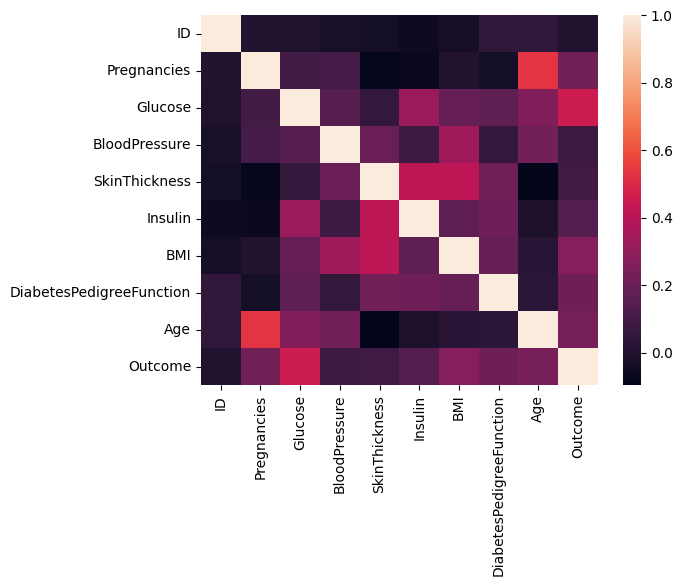

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.merge(X, Y, on='ID').corr(numeric_only=True))

plt.show()

In [147]:
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y_feature = 'Outcome'

#### 모델링

In [148]:
XF, X_submissionF, YF = get_classification_model_data(dfX, Y, len(X), x_features, y_feature, is_normalized=True)

In [149]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234, stratify=YF)

In [150]:
result = compare_classification_model(xtrain, xtest, ytrain, ytest, is_binary_model=True)

In [154]:
result.sort_values(['ROC_AUC', 'Test_Accuracy'], ascending=[False, False])

,Train_Accuracy,Test_Accuracy,DIFF,ROC_AUC
LogisticRegression,0.7832,0.7297,0.0535,0.8113
RandomForestClassifier,1.0000,0.7405,0.2595,0.8041
XGBClassifier,1.0000,0.7514,0.2486,0.7900
KNeighborsClassifier,0.8322,0.7189,0.1132,0.7638
DecisionTreeClassifier,1.0000,0.6919,0.3081,0.6577


In [161]:
model = LogisticRegression(max_iter=5000, random_state=1234).fit(xtrain, ytrain)
print(get_classification_model_score(model, xtrain, xtest, ytrain, ytest, is_binary_model=True))

Train_Accuracy   0.7832
Test_Accuracy    0.7297
ROC_AUC          0.8113
dtype: float64


In [162]:
Y_pred = model.predict_proba(X_submissionF)[:, 1]

submission = pd.DataFrame({'ID': X_submission['ID'], 
                           y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교 (ROC AUC Score)

In [163]:
Y_predict = pd.read_csv('./submission.csv')

In [164]:
Y_actual.head(2)

,ID,Outcome
0,13,0
1,18,0


In [166]:
Y_predict.head(2)

,ID,Outcome
0,13,0.1917
1,18,0.3296


In [167]:
print(roc_auc_score(Y_actual[y_feature], Y_predict[y_feature]))

0.8084481175390267


## 회귀

### 회귀 모델을 위한 공통 함수

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
def get_regression_model_score(model, xtrain, xtest, ytrain, ytest):
    S1 = model.score(xtrain, ytrain)
    S2 = model.score(xtest, ytest)
    
    ypred = model.predict(xtest)
    
    S3 = mse(ytest, ypred)
    S4 = mae(ytest, ypred)
    S5 = np.sqrt(S3)
    
    ypred = np.where(ypred <  0, 0, ypred)
    S6 = msle(ytest, ypred)
    S7 = np.sqrt(S6)
    
    scores = pd.Series([S1, S2, S3, S4, S5, S6, S7], index='Train_R2 Test_R2 MSE MAE RMSE MSLE RMSLE'.split())
    return scores

In [4]:
def compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False):
    result = pd.DataFrame()
    
    model = LinearRegression().fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
    
    if is_regularized:
        model = Lasso(alpha=1.0, max_iter=1000, tol=0.0001, random_state=1234).fit(xtrain, ytrain)
        result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
        
        model = Ridge(alpha=1.0, max_iter=1000, tol=0.0001, random_state=1234).fit(xtrain, ytrain)
        result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)

    model = KNeighborsRegressor(n_neighbors=5).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
    
    model = DecisionTreeRegressor(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
    
    model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
    
    model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_regression_model_score(model, xtrain, xtest, ytrain, ytest)
    
    result = result.T
    result.insert(loc=2, column='DIFF', value=(result['Train_R2'] - result['Test_R2']).abs())
    
    return result

In [5]:
def get_regression_model_data(dfX, Y, train_size, x_features, y_feature, is_regularized=False):
    X_temp = dfX[x_features]
    YF = Y[y_feature]
    
    if is_regularized:
        X_temp = StandardScaler().fit_transform(X_temp)
        
    XF = X_temp[:train_size]
    X_submissionF = X_temp[train_size:]
    
    return XF, X_submissionF, YF

### 학생성적 예측 데이터

```{attention} 
데이터 설명 : 학생성적 예측 (종속변수 :G3)        
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_test.csv    
데이터 출처 :https://www.kaggle.com/datasets/ishandutta/student-performance-data-set (참고, 데이터 수정)    
```  

```{admonition} 캐글 공유 코드 저장소 
**본인만의 코드를 작성하고 upvote를 받아 broze medal을 획득 해보세요**
[캐글 노트북 링크](https://www.kaggle.com/datasets/kukuroo3/student-performance-data-set-competition-form/code?select=y_train.csv)
```

In [39]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/X_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/studentscore/y_test.csv")

display(x_train.head())
display(y_train.head())

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1714,GP,F,18,U,GT3,T,4,3,other,other,reputation,...,yes,yes,no,4,3,3,1,1,3,0,14,13
1,1254,GP,F,17,U,GT3,T,4,3,health,other,reputation,...,yes,yes,yes,4,4,3,1,3,4,0,13,15
2,1639,GP,F,16,R,GT3,T,4,4,health,teacher,other,...,yes,no,no,2,4,4,2,3,4,6,10,11
3,1118,GP,M,16,U,GT3,T,4,4,services,services,course,...,yes,yes,no,5,3,3,1,3,5,0,15,13
4,1499,GP,M,19,U,GT3,T,3,2,services,at_home,home,...,no,yes,yes,4,5,4,1,1,4,0,5,0


,StudentID,G3
0,1714,14
1,1254,15
2,1639,11
3,1118,13
4,1499,0


In [40]:
X = x_train.copy()
Y = y_train.copy()
X_submission = x_test.copy()
Y_actual = y_test.copy()

#### EDA

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   678 non-null    int64 
 1   school      678 non-null    object
 2   sex         678 non-null    object
 3   age         678 non-null    int64 
 4   address     678 non-null    object
 5   famsize     678 non-null    object
 6   Pstatus     678 non-null    object
 7   Medu        678 non-null    int64 
 8   Fedu        678 non-null    int64 
 9   Mjob        678 non-null    object
 10  Fjob        678 non-null    object
 11  reason      678 non-null    object
 12  guardian    678 non-null    object
 13  traveltime  678 non-null    int64 
 14  studytime   678 non-null    int64 
 15  failures    678 non-null    int64 
 16  schoolsup   678 non-null    object
 17  famsup      678 non-null    object
 18  paid        678 non-null    object
 19  activities  678 non-null    object
 20  nursery   

In [42]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   366 non-null    int64 
 1   school      366 non-null    object
 2   sex         366 non-null    object
 3   age         366 non-null    int64 
 4   address     366 non-null    object
 5   famsize     366 non-null    object
 6   Pstatus     366 non-null    object
 7   Medu        366 non-null    int64 
 8   Fedu        366 non-null    int64 
 9   Mjob        366 non-null    object
 10  Fjob        366 non-null    object
 11  reason      366 non-null    object
 12  guardian    366 non-null    object
 13  traveltime  366 non-null    int64 
 14  studytime   366 non-null    int64 
 15  failures    366 non-null    int64 
 16  schoolsup   366 non-null    object
 17  famsup      366 non-null    object
 18  paid        366 non-null    object
 19  activities  366 non-null    object
 20  nursery   

In [43]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   StudentID  678 non-null    int64
 1   G3         678 non-null    int64
dtypes: int64(2)
memory usage: 10.7 KB


#### 데이터 전처리

In [52]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [53]:
dfX.isna().sum().sum()

0

In [54]:
dfX.isnull().sum().sum()

0

In [65]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   StudentID          1044 non-null   int64
 1   school             1044 non-null   int32
 2   sex                1044 non-null   int32
 3   age                1044 non-null   int64
 4   address            1044 non-null   int32
 5   famsize            1044 non-null   int32
 6   Pstatus            1044 non-null   int32
 7   Medu               1044 non-null   int64
 8   Fedu               1044 non-null   int64
 9   traveltime         1044 non-null   int64
 10  studytime          1044 non-null   int64
 11  failures           1044 non-null   int64
 12  schoolsup          1044 non-null   int64
 13  famsup             1044 non-null   int64
 14  paid               1044 non-null   int64
 15  activities         1044 non-null   int64
 16  nursery            1044 non-null   int64
 17  higher        

In [55]:
for feature in dfX.select_dtypes(include='object'):
    print(f'{feature} - {dfX[feature].unique()}')

school - ['GP' 'MS']
sex - ['F' 'M']
address - ['U' 'R']
famsize - ['GT3' 'LE3']
Pstatus - ['T' 'A']
Mjob - ['other' 'health' 'services' 'at_home' 'teacher']
Fjob - ['other' 'teacher' 'services' 'at_home' 'health']
reason - ['reputation' 'other' 'course' 'home']
guardian - ['father' 'mother' 'other']
schoolsup - ['no' 'yes']
famsup - ['yes' 'no']
paid - ['yes' 'no']
activities - ['no' 'yes']
nursery - ['yes' 'no']
higher - ['yes' 'no']
internet - ['yes' 'no']
romantic - ['no' 'yes']


In [59]:
for feature in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    dfX[feature] = dfX[feature].replace(['no', 'yes'], [0, 1])

In [ ]:
# school - ['GP' 'MS']
# sex - ['F' 'M']
# address - ['U' 'R']
# famsize - ['GT3' 'LE3']
# Pstatus - ['T' 'A']

In [62]:
for feature in ['school', 'sex', 'address', 'famsize', 'Pstatus']:
    dfX[feature] = LabelEncoder().fit_transform(dfX[feature])

In [64]:
features = ['Mjob', 'Fjob', 'reason', 'guardian']

temp_dfs = [dfX.drop(columns=features)]

for feature in features:
    temp = pd.get_dummies(dfX[feature], prefix=feature)
    temp_dfs.append(temp)
    
dfX = pd.concat(temp_dfs, axis=1)

#### Feature Engineering

In [44]:
dfXY = pd.merge(X, Y, on='StudentID')

In [47]:
dfXY.corr(numeric_only=True)['G3'].sort_values(ascending=False)
# G3            1.0000
# G2            0.9154
# G1            0.8151
# Medu          0.2391
# Fedu          0.1888
# studytime     0.1436

G3            1.0000
G2            0.9154
G1            0.8151
Medu          0.2391
Fedu          0.1888
studytime     0.1436
StudentID     0.0796
famrel        0.0432
absences     -0.0345
health       -0.0606
freetime     -0.0735
Walc         -0.0842
age          -0.1030
Dalc         -0.1047
goout        -0.1056
traveltime   -0.1264
failures     -0.3936
Name: G3, dtype: float64

In [51]:
for feature in X.select_dtypes(include='object'):
    print(f'{feature} - {dfXY[feature].value_counts(normalize=True)}')
    print("-" * 30)

school - school
GP   0.7507
MS   0.2493
Name: proportion, dtype: float64
------------------------------
sex - sex
F   0.5811
M   0.4189
Name: proportion, dtype: float64
------------------------------
address - address
U   0.7360
R   0.2640
Name: proportion, dtype: float64
------------------------------
famsize - famsize
GT3   0.7065
LE3   0.2935
Name: proportion, dtype: float64
------------------------------
Pstatus - Pstatus
T   0.8879
A   0.1121
Name: proportion, dtype: float64
------------------------------
Mjob - Mjob
other      0.3746
services   0.2434
at_home    0.1740
teacher    0.1313
health     0.0767
Name: proportion, dtype: float64
------------------------------
Fjob - Fjob
other      0.5472
services   0.2891
teacher    0.0634
at_home    0.0619
health     0.0383
Name: proportion, dtype: float64
------------------------------
reason - reason
course       0.3968
reputation   0.2537
home         0.2434
other        0.1062
Name: proportion, dtype: float64
-----------------------

In [66]:
dfXY = pd.merge(dfX, Y, on='StudentID')

In [68]:
dfXY.corr()['G3'].sort_values(ascending=False)
# G3                   1.0000
# G2                   0.9154
# G1                   0.8151
# higher               0.2589
# Medu                 0.2391
# Fedu                 0.1888
# studytime            0.1436
# address              0.1224
# Mjob_health          0.1172
# reason_reputation    0.1159
# Mjob_teacher         0.1078

G3                   1.0000
G2                   0.9154
G1                   0.8151
higher               0.2589
Medu                 0.2391
Fedu                 0.1888
studytime            0.1436
address              0.1224
Mjob_health          0.1172
reason_reputation    0.1159
Mjob_teacher         0.1078
Fjob_teacher         0.0991
internet             0.0942
StudentID            0.0796
famsize              0.0758
Fjob_health          0.0561
Mjob_services        0.0459
famrel               0.0432
nursery              0.0363
activities           0.0307
famsup               0.0276
guardian_father      0.0247
guardian_mother      0.0198
reason_home          0.0037
Pstatus              0.0017
sex                 -0.0074
Fjob_other          -0.0196
Fjob_services       -0.0292
reason_other        -0.0315
absences            -0.0345
Fjob_at_home        -0.0494
paid                -0.0564
health              -0.0606
freetime            -0.0735
guardian_other      -0.0743
schoolsup           

In [75]:
x_features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', \
              'studytime', 'failures', 'schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', \
              'internet','romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health','absences', \
              'G1', 'G2', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', \
              'Fjob_at_home', 'Fjob_health','Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',\
              'reason_home', 'reason_other', 'reason_reputation', 'guardian_father','guardian_mother', 'guardian_other']
y_feature = 'G3'

#### 모델링

In [100]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

print([x.shape for x in [X, X_submission, Y]])
print([x.shape for x in [XF, X_submissionF, YF]])

[(678, 33), (366, 33), (678, 2)]
[(678, 45), (366, 45), (678,)]


In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(474, 45), (204, 45), (474,), (204,)]


In [102]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False)

In [105]:
result.sort_values(['Test_R2', 'DIFF'], ascending=[False, True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
RandomForestRegressor,0.9843,0.8170,0.1673,2.6109,0.9249,1.6158,0.1414,0.3760
KNeighborsRegressor,0.8838,0.8020,0.0818,2.8245,1.0755,1.6806,0.1426,0.3776
XGBRegressor,0.9999,0.7884,0.2115,3.0180,0.9965,1.7373,0.1525,0.3905
LinearRegression,0.8766,0.7785,0.0982,3.1603,1.0845,1.7777,0.1821,0.4267
DecisionTreeRegressor,0.9999,0.6399,0.3600,5.1373,1.1569,2.2666,0.2312,0.4808


In [109]:
model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2   0.9843
Test_R2    0.8170
MSE        2.6109
MAE        0.9249
RMSE       1.6158
MSLE       0.1414
RMSLE      0.3760
dtype: float64


In [111]:
Y_pred = model.predict(X_submissionF)

submission = pd.DataFrame({'StudentID': X_submission['StudentID'], \
                           'G3': Y_pred})
submission.to_csv('./submission.csv', index=False)

In [116]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']) \
    .sort_values('Importance', ascending=False) \
    .head(5)

,Importance
G2,0.8445
absences,0.0555
G1,0.0123
goout,0.0102
studytime,0.0084


#### 실제값과 비교 (Mean Squared Error)

In [123]:
Y_predict = pd.read_csv('./submission.csv')

In [124]:
Y_actual.head(2)

,StudentID,G3
0,1000,16
1,1008,11


In [125]:
Y_predict.head(2)

,StudentID,G3
0,1000,16.1600
1,1008,11.0200


In [127]:
mse(Y_actual[y_feature], Y_predict[y_feature])

2.925355425698239

In [129]:
result = pd.merge(Y_actual, Y_predict, on='StudentID')

In [131]:
result['squared_error'] = (result['G3_y'] - result['G3_x']) ** 2

In [132]:
result.head(2)

,StudentID,G3_x,G3_y,squared_error
0,1000,16,16.1600,0.0256
1,1008,11,11.0200,0.0004


In [133]:
result['squared_error'].mean()

2.925355425698239

### 중고차 가격 예측 데이터

```{attention} 
데이터 설명 : 중고차 가격 예측 데이터 (종속변수 :G3)        
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_test.csv    
데이터 출처 :https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=vw.csv (참고, 데이터 수정)    
```  

```{admonition} 캐글 공유 코드 저장소 
**본인만의 코드를 작성하고 upvote를 받아 broze medal을 획득 해보세요**
[캐글 노트북 링크](https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format/code?select=y_train.csv)
```

In [134]:
import pandas as pd
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_test.csv")

display(x_train.head())
display(y_train.head())

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0000,39.8000,2.2000
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0000,60.1000,2.0000
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0000,29.1000,2.9000
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0000,57.6000,2.0000
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0000,47.1000,1.0000


,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [135]:
X = x_train.copy()
Y = y_train.copy()
X_submission = x_test.copy()
Y_actual = y_test.copy()

#### EDA

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [137]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         2672 non-null   int64  
 1   brand         2672 non-null   object 
 2   model         2672 non-null   object 
 3   year          2672 non-null   int64  
 4   transmission  2672 non-null   object 
 5   mileage       2672 non-null   int64  
 6   fuelType      2672 non-null   object 
 7   tax           2672 non-null   float64
 8   mpg           2672 non-null   float64
 9   engineSize    2672 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 208.9+ KB


In [138]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   carID   4960 non-null   int64
 1   price   4960 non-null   int64
dtypes: int64(2)
memory usage: 77.6 KB


#### 데이터 전처리

In [156]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [163]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7632 entries, 0 to 7631
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carID                   7632 non-null   int64  
 1   brand                   7632 non-null   int32  
 2   model                   7632 non-null   int32  
 3   year                    7632 non-null   int64  
 4   mileage                 7632 non-null   int64  
 5   tax                     7632 non-null   float64
 6   mpg                     7632 non-null   float64
 7   engineSize              7632 non-null   float64
 8   transmission_Automatic  7632 non-null   bool   
 9   transmission_Manual     7632 non-null   bool   
 10  transmission_Other      7632 non-null   bool   
 11  transmission_Semi-Auto  7632 non-null   bool   
 12  fuelType_Diesel         7632 non-null   bool   
 13  fuelType_Electric       7632 non-null   bool   
 14  fuelType_Hybrid         7632 non-null   

In [158]:
dfX.isna().sum().sum()

0

In [159]:
dfX.isnull().sum().sum()

0

In [160]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} - {dfX[feature].unique()}')

brand - ['hyundi' 'vauxhall' 'audi' 'vw' 'skoda' 'merc' 'toyota' 'bmw' 'ford']
model - [' Santa Fe' ' GTC' ' RS4' ' Scirocco' ' Scala' ' V Class' ' Prius' ' M4'
 ' Camry' ' KA' ' Vivaro' ' CLS Class' ' Caravelle' ' Arteon' ' Shuttle'
 ' I40' ' IX20' ' 6 Series' ' GL Class' ' S Class' ' S3' ' Yeti' ' Galaxy'
 ' Puma' ' Edge' ' A8' ' SLK' ' Kamiq' ' RS6' ' CLA Class' ' Land Cruiser'
 ' M Class' ' Q8' ' i3' ' Verso' ' Mustang' ' IX35' ' Amarok' ' Avensis'
 ' Grand Tourneo Connect' ' Antara' ' Tourneo Connect' ' Beetle' ' X4'
 ' CC' ' GT86' ' X-CLASS' ' I800' ' i8' ' Caddy Maxi Life' ' Combo Life'
 ' Rapid' ' SQ7' ' Grand C-MAX' ' Tourneo Custom' ' California' ' Agila'
 ' A7' ' Zafira Tourer' ' G Class' ' Tiguan Allspace' ' X6' ' M2' ' X7'
 ' 7 Series' ' Z4' ' RS5' ' Hilux' ' GLS Class' ' GLB Class' ' M5' ' RS3'
 ' Caddy Life' ' SQ5' ' Supra' ' 8 Series' ' Fusion' ' M6' ' M3' ' Jetta'
 ' S4' ' R8' ' PROACE VERSO' ' Caddy' ' Getz' ' Eos' ' CLK' ' IQ' ' Z3'
 ' Roomster']
transmission - ['Sem

In [161]:
for feature in ['brand', 'model']:
    dfX[feature] = LabelEncoder().fit_transform(dfX[feature])

In [162]:
features = ['transmission', 'fuelType']
temp = dfX.drop(columns=features)
temp_list = [temp]

for feature in features:
    temp = pd.get_dummies(dfX[feature], prefix=feature)
    temp_list.append(temp)

dfX = pd.concat(temp_list, axis=1)

#### Feature Engineering

In [140]:
dfXY = pd.merge(X, Y, on='carID')

In [142]:
dfXY.corr(numeric_only=True)['price'].sort_values(ascending=False)

price         1.0000
engineSize    0.6249
year          0.5013
tax           0.1447
carID         0.0121
mpg          -0.1779
mileage      -0.4787
Name: price, dtype: float64

In [145]:
for feature in dfXY.select_dtypes(include='object').columns:
    print(f'{feature} - {dfXY[feature].value_counts()}')
    print('-' * 30)

brand - brand
merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: count, dtype: int64
------------------------------
model - model
 Arteon                   167
 Grand C-MAX              164
 Scirocco                 163
 Prius                    154
 Santa Fe                 150
 CLS Class                146
 V Class                  139
 Scala                    138
 IX20                     135
 Galaxy                   135
 KA                       130
 Edge                     129
 S Class                  123
 Combo Life               113
 X4                       113
 Rapid                    107
 Yeti                      90
 M4                        87
 A8                        84
 Kamiq                     83
 GL Class                  79
 A7                        78
 IX35                      77
 I40                       74
 Amarok                    74
 Verso               

In [164]:
dfXY = pd.merge(dfX, Y, on='carID')

In [167]:
dfXY.corr()['price'].sort_values(ascending=False).head(10)

price                     1.0000
engineSize                0.6249
year                      0.5013
transmission_Semi-Auto    0.3685
transmission_Automatic    0.1728
tax                       0.1447
model                     0.0611
fuelType_Diesel           0.0558
carID                     0.0121
fuelType_Electric        -0.0065
Name: price, dtype: float64

In [171]:
x_features = ['brand', 'model', 'year', 'mileage', 'tax', 'mpg','engineSize', \
              'transmission_Automatic', 'transmission_Manual','transmission_Other', 'transmission_Semi-Auto', \
              'fuelType_Diesel','fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other','fuelType_Petrol']
y_feature = 'price'

#### 모델링

In [228]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

In [229]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [230]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest)

In [231]:
result.sort_values(['MSE', 'RMSLE'], ascending=[True, True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
RandomForestRegressor,0.9921,0.9580,0.0341,"11,205,433.1151","1,983.0427","3,347.4517",0.0217,0.1473
XGBRegressor,0.9951,0.9511,0.0440,"13,041,190.3284","1,989.6110","3,611.2588",0.0222,0.1488
DecisionTreeRegressor,0.9999,0.8367,0.1632,"43,555,475.0798","2,797.1312","6,599.6572",0.0426,0.2063
LinearRegression,0.6901,0.7140,0.0239,"76,288,658.1666","5,763.0036","8,734.3379",2.1670,1.4721
KNeighborsRegressor,0.5354,0.3268,0.2086,"179,584,797.2733","9,215.3743","13,400.9252",0.3169,0.5629


In [232]:
model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2            0.9921
Test_R2             0.9580
MSE        11,205,433.1151
MAE             1,983.0427
RMSE            3,347.4517
MSLE                0.0217
RMSLE               0.1473
dtype: float64


In [233]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'carID': X_submission['carID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

In [234]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']) \
    .sort_values('Importance', ascending=False) \
    .head()

,Importance
engineSize,0.4499
year,0.1707
mileage,0.1641
mpg,0.0877
model,0.0642


#### 결과 비교 (Rooted Mean Squared Log Error)

In [237]:
Y_predict = pd.read_csv('./submission.csv')

In [238]:
Y_actual.head(2)

,carID,price
0,12000,38000
1,12001,23495


In [239]:
Y_predict.head(2)

,carID,price
0,12000,"40,048.5400"
1,12001,"24,346.2500"


In [241]:
print(f'{msle(Y_actual[y_feature], np.where(Y_predict[y_feature] < 0, 0, Y_predict[y_feature])):,.4f}')

0.0227


In [249]:
result = pd.merge(Y_actual, Y_predict, on='carID')

In [250]:
result['diff'] = result['price_y'] - result['price_x']

In [253]:
result.sort_values('diff', ascending=False).head()

,carID,price_x,price_y,diff
1581,16459,28615,"57,554.7900","28,939.7900"
665,13882,28489,"55,122.2900","26,633.2900"
2092,17901,30500,"50,340.7500","19,840.7500"
1058,14998,24791,"42,102.5400","17,311.5400"
1319,15731,29998,"46,764.4500","16,766.4500"


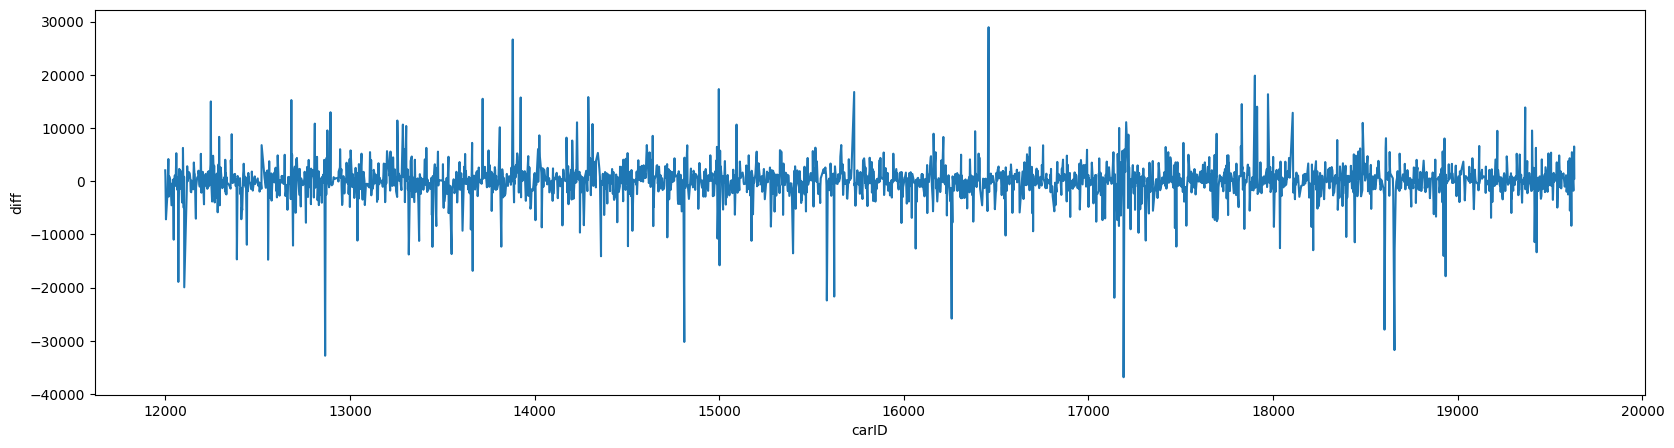

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.lineplot(data=result, x='carID', y='diff')
plt.show()

### 의료 비용 예측 데이터

```{attention} 
데이터 설명 : 의료비용 예측문제 (종속변수 :charges)        
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_test.csv    
데이터 출처 :https://www.kaggle.com/mirichoi0218/insurance/code(참고, 데이터 수정)    
```  

In [334]:
import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/MedicalCost/y_test.csv")

display(X.head())
display(Y.head())

,ID,age,sex,bmi,children,smoker,region
0,2,35,female,35.8600,2,no,southeast
1,3,28,female,23.8450,2,no,northwest
2,4,23,female,32.7800,2,yes,southeast
3,6,52,female,25.3000,2,yes,southeast
4,7,63,male,39.8000,3,no,southwest


,ID,charges
0,2,"5,836.5204"
1,3,"4,719.7365"
2,4,"36,021.0112"
3,6,"24,667.4190"
4,7,"15,170.0690"


#### EDA

In [263]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 58.6+ KB


In [265]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        268 non-null    int64  
 1   age       268 non-null    int64  
 2   sex       268 non-null    object 
 3   bmi       268 non-null    float64
 4   children  268 non-null    int64  
 5   smoker    268 non-null    object 
 6   region    268 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 14.8+ KB


In [264]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1070 non-null   int64  
 1   charges  1070 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


#### 데이터 전처리

In [269]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [285]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int8   
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int8   
 6   region    1338 non-null   int32  
dtypes: float64(1), int32(1), int64(3), int8(2)
memory usage: 49.8 KB


In [271]:
dfX.isna().sum().sum()

0

In [272]:
dfX.isnull().sum().sum()

0

In [274]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} - {dfX[feature].unique()}')

sex - ['female' 'male']
smoker - ['no' 'yes']
region - ['southeast' 'northwest' 'southwest' 'northeast']


In [275]:
dfX['sex'] = dfX['sex'].astype('category').cat.codes

In [277]:
dfX['smoker'] = dfX['smoker'].astype('category').cat.codes

In [278]:
dfX['region'] = LabelEncoder().fit_transform(dfX['region'])

#### Feature Engineering

In [266]:
dfXY = pd.merge(X, Y, on='ID')

In [267]:
dfXY.corr(numeric_only=True)

,ID,age,bmi,children,charges
ID,1.0000,-0.0641,-0.0244,0.0046,0.0288
age,-0.0641,1.0000,0.1197,0.0500,0.3066
bmi,-0.0244,0.1197,1.0000,0.0180,0.1998
children,0.0046,0.0500,0.0180,1.0000,0.0812
charges,0.0288,0.3066,0.1998,0.0812,1.0000


In [268]:
for feature in dfXY.select_dtypes(include='object').columns:
    print(f'{feature} - {dfXY[feature].value_counts(normalize=True)}')
    print('-' * 30)

sex - sex
male     0.5056
female   0.4944
Name: proportion, dtype: float64
------------------------------
smoker - smoker
no    0.8037
yes   0.1963
Name: proportion, dtype: float64
------------------------------
region - region
southeast   0.2701
northwest   0.2495
southwest   0.2477
northeast   0.2327
Name: proportion, dtype: float64
------------------------------


In [280]:
dfXY = pd.merge(dfX, Y, on='ID')

In [281]:
dfXY.corr()

,ID,age,sex,bmi,children,smoker,region,charges
ID,1.0000,-0.0641,-0.0348,-0.0244,0.0046,0.0436,0.0105,0.0288
age,-0.0641,1.0000,-0.0360,0.1197,0.0500,-0.0117,0.0131,0.3066
sex,-0.0348,-0.0360,1.0000,0.0430,0.0345,0.0651,-0.0139,0.0375
bmi,-0.0244,0.1197,0.0430,1.0000,0.0180,0.0151,0.1555,0.1998
children,0.0046,0.0500,0.0345,0.0180,1.0000,0.0193,0.0146,0.0812
smoker,0.0436,-0.0117,0.0651,0.0151,0.0193,1.0000,0.0345,0.7906
region,0.0105,0.0131,-0.0139,0.1555,0.0146,0.0345,1.0000,0.0187
charges,0.0288,0.3066,0.0375,0.1998,0.0812,0.7906,0.0187,1.0000


In [287]:
x_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y_feature = 'charges'

#### 모델링

In [350]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

In [351]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [352]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False)

In [353]:
result.sort_values(['MSE', 'MAE'], ascending=[True, True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
RandomForestRegressor,0.9759,0.8210,0.1549,"27,125,129.9677","2,794.7571","5,208.1791",0.2638,0.5136
XGBRegressor,0.9980,0.7841,0.2139,"32,726,429.6646","3,128.5586","5,720.7019",0.3135,0.5599
LinearRegression,0.7488,0.7543,0.0055,"37,242,179.8923","4,028.1174","6,102.6371",1.4408,1.2003
DecisionTreeRegressor,0.9993,0.6633,0.3360,"51,024,003.4810","3,539.2204","7,143.1088",0.3840,0.6197
KNeighborsRegressor,0.4089,0.0625,0.3464,"142,079,353.6870","8,043.9019","11,919.7044",0.7549,0.8689


In [354]:
model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2            0.9759
Test_R2             0.8210
MSE        27,125,129.9677
MAE             2,794.7571
RMSE            5,208.1791
MSLE                0.2638
RMSLE               0.5136
dtype: float64


In [355]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

In [356]:
pd.DataFrame(model.feature_importances_, index=x_features, columns=['Importance'])

,Importance
age,0.1375
sex,0.0057
bmi,0.2064
children,0.0171
smoker,0.6190
region,0.0143


#### 실제값과 비교 (MAE)

In [357]:
Y_predict = pd.read_csv('./submission.csv')

In [358]:
Y_actual.head()

,ID,charges
0,0,"4,536.2590"
1,1,"2,200.8308"
2,5,"7,337.7480"
3,21,"19,673.3357"
4,26,"11,093.6229"


In [359]:
Y_predict.head()

,ID,charges
0,0,"5,740.5625"
1,1,"2,577.8973"
2,5,"8,196.4459"
3,21,"13,092.3042"
4,26,"12,391.6414"


In [360]:
print(f'{mae(Y_actual[y_feature], Y_predict[y_feature]):,.4f}')

1,692.8343


In [361]:
result = pd.merge(Y_actual, Y_predict, on='ID')

In [362]:
result.head()

,ID,charges_x,charges_y
0,0,"4,536.2590","5,740.5625"
1,1,"2,200.8308","2,577.8973"
2,5,"7,337.7480","8,196.4459"
3,21,"19,673.3357","13,092.3042"
4,26,"11,093.6229","12,391.6414"


In [363]:
result['ERROR'] = result['charges_x'] - result['charges_y']

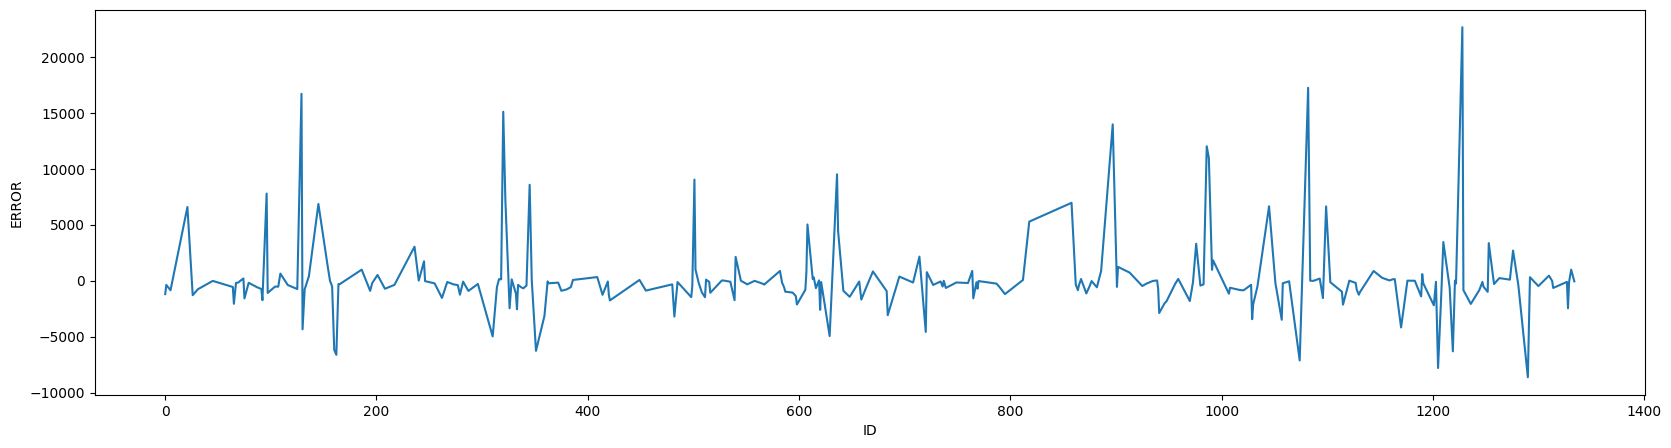

In [364]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=result, x='ID', y='ERROR')
plt.show()

### 킹카운티 주거지 가격예측문제 데이터

```{attention} 
데이터 설명 : 킹카운티 주거지 가격 예측문제 (종속변수 :price)         
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_test.csv    
데이터 출처 :https://www.kaggle.com/harlfoxem/housesalesprediction (참고, 데이터 수정)    
```  

In [6]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_test.csv")

display(X.head())
display(Y.head())

,ID,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,8651400730,20150428T000000,3,1.0000,840,5525,1.0000,0,0,5,6,840,0,1969,0,98042,47.3607,-122.0850,920,5330
1,3,3163600130,20150317T000000,3,1.0000,1250,8000,1.0000,0,0,3,7,1250,0,1956,0,98146,47.5065,-122.3370,1040,6973
2,4,5045700330,20140725T000000,4,2.5000,2200,6400,2.0000,0,0,3,8,2200,0,2010,0,98059,47.4856,-122.1560,2600,5870
3,5,1036100130,20140808T000000,3,2.5000,1980,39932,2.0000,0,0,3,8,1980,0,1994,0,98011,47.7433,-122.1960,2610,12769
4,6,7696630080,20140506T000000,3,1.7500,1690,7735,1.0000,0,0,4,7,1060,630,1976,0,98001,47.3324,-122.2800,1580,7503


,ID,price
0,2,"191,000.0000"
1,3,"234,900.0000"
2,4,"460,000.0000"
3,5,"442,000.0000"
4,6,"197,000.0000"


#### EDA

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [8]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4323 non-null   int64  
 1   id             4323 non-null   int64  
 2   date           4323 non-null   object 
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  lat            4323 non-null   float64
 18  long    

In [9]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      17290 non-null  int64  
 1   price   17290 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 270.3 KB


#### 데이터 전처리

In [10]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [18]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  datetime64[ns]
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [12]:
dfX.isna().sum().sum(), dfX.isnull().sum().sum()

(0, 0)

In [14]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} - {dfX[feature].unique()}')

date - ['20150428T000000' '20150317T000000' '20140725T000000' '20140808T000000'
 '20140506T000000' '20140806T000000' '20140901T000000' '20141014T000000'
 '20150414T000000' '20150217T000000' '20141001T000000' '20150316T000000'
 '20141229T000000' '20150409T000000' '20150326T000000' '20141110T000000'
 '20140505T000000' '20141111T000000' '20140721T000000' '20140820T000000'
 '20150123T000000' '20150402T000000' '20140519T000000' '20150422T000000'
 '20140716T000000' '20140623T000000' '20150319T000000' '20141113T000000'
 '20140915T000000' '20141203T000000' '20141119T000000' '20150508T000000'
 '20150323T000000' '20140916T000000' '20141029T000000' '20150304T000000'
 '20150309T000000' '20150327T000000' '20140919T000000' '20150311T000000'
 '20150507T000000' '20150107T000000' '20140918T000000' '20140905T000000'
 '20150511T000000' '20150330T000000' '20141003T000000' '20141227T000000'
 '20150318T000000' '20150211T000000' '20150412T000000' '20140624T000000'
 '20140728T000000' '20140627T000000' '201411

In [17]:
dfX['date'] = pd.to_datetime(dfX['date'])

#### Feature Engineering

In [36]:
x_features = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', \
              'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', \
              'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']
y_feature = 'price'

In [37]:
dfXY = pd.merge(dfX, Y, on='ID')

In [38]:
dfXY.corr()[y_feature].sort_values(ascending=False).head()

price           1.0000
sqft_living     0.7056
grade           0.6681
sqft_above      0.6099
sqft_living15   0.5841
Name: price, dtype: float64

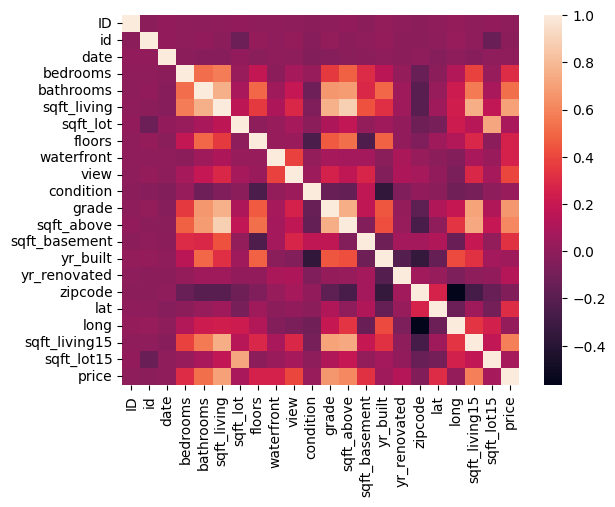

In [39]:
sns.heatmap(data=dfXY.corr())
plt.show()

#### 모델링

In [40]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [42]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False)

In [44]:
result.sort_values(['MSE'], ascending=[True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
XGBRegressor,0.9811,0.8889,0.0921,"15,682,106,771.8249","69,562.8760","125,228.2188",0.0303,0.1741
RandomForestRegressor,0.9819,0.8848,0.0971,"16,264,097,705.6438","69,023.4043","127,530.7716",0.0312,0.1765
DecisionTreeRegressor,0.9995,0.7535,0.2460,"34,812,956,320.3958","102,918.2026","186,582.3044",0.0640,0.2529
LinearRegression,0.6949,0.7052,0.0103,"41,625,632,747.4795","126,871.1440","204,023.6083",0.8943,0.9457
KNeighborsRegressor,0.5826,0.2607,0.3220,"104,400,522,988.8125","172,696.7354","323,110.6977",0.1807,0.4250


In [45]:
model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2                0.9811
Test_R2                 0.8889
MSE        15,682,106,771.8249
MAE                69,562.8760
RMSE              125,228.2188
MSLE                    0.0303
RMSLE                   0.1741
dtype: float64


In [46]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교

In [48]:
Y_predict = pd.read_csv('submission.csv')

In [49]:
Y_actual.head()

,ID,price
0,0,"480,000.0000"
1,1,"450,000.0000"
2,14,"430,000.0000"
3,22,"580,000.0000"
4,26,"500,000.0000"


In [50]:
Y_predict.head()

,ID,price
0,0,"359,823.7500"
1,1,"488,167.2200"
2,14,"387,954.7800"
3,22,"536,118.4400"
4,26,"541,876.2000"


In [51]:
result = pd.merge(Y_actual, Y_predict, on='ID')

In [52]:
result['ERROR'] = result['price_x'] - result['price_y']

In [53]:
result.head()

,ID,price_x,price_y,ERROR
0,0,"480,000.0000","359,823.7500","120,176.2500"
1,1,"450,000.0000","488,167.2200","-38,167.2200"
2,14,"430,000.0000","387,954.7800","42,045.2200"
3,22,"580,000.0000","536,118.4400","43,881.5600"
4,26,"500,000.0000","541,876.2000","-41,876.2000"


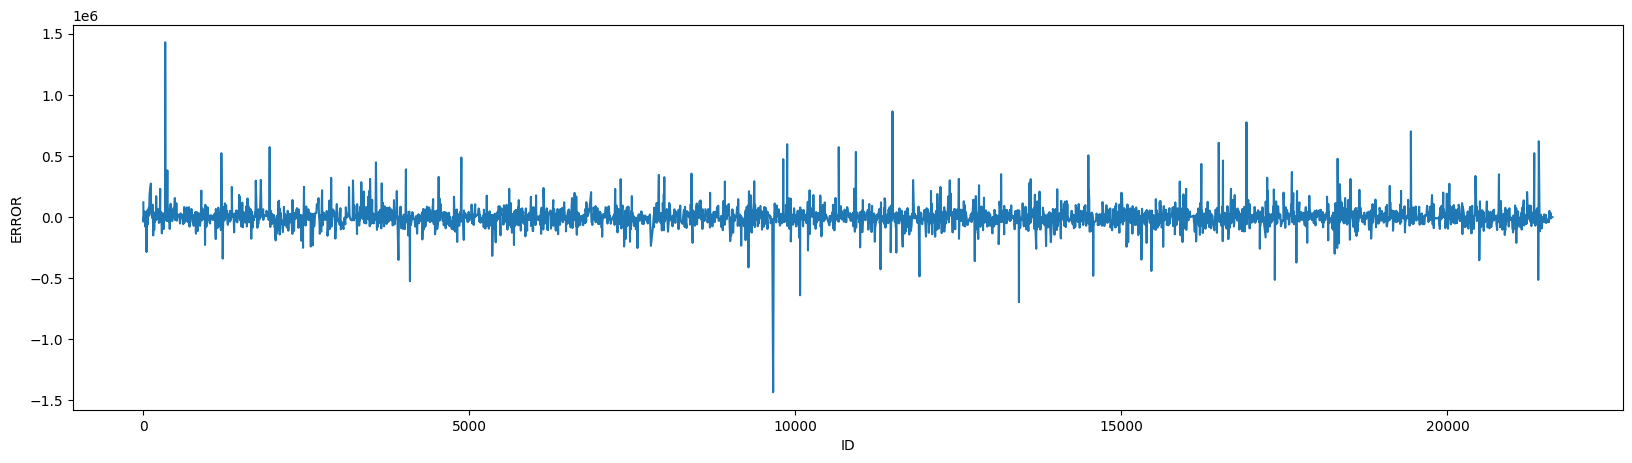

In [56]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x='ID', y='ERROR')
plt.show()

### 대학원 입학가능성 데이터

```{attention} 
데이터 설명 : 대학원 입학 가능성 예측  (종속변수 :Chance of Admit)      
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/y_test.csv    
데이터 출처 :https://www.kaggle.com/mohansacharya/graduate-admissions(참고, 데이터 수정)     
```  

In [57]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/admission/y_test.csv")

display(X.head())
display(Y.head())

,ID,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,67,327,114,3,3.0000,3.0000,9.0200,0
1,1,112,321,109,4,4.0000,4.0000,8.6800,1
2,2,495,301,99,3,2.5000,2.0000,8.4500,1
3,3,356,317,106,2,2.0000,3.5000,8.1200,0
4,4,250,321,111,3,3.5000,4.0000,8.8300,1


,ID,Chance of Admit
0,0,0.6100
1,1,0.6900
2,2,0.6800
3,3,0.7300
4,4,0.7700


#### EDA

In [58]:
Y['Chance of Admit'].min(), Y['Chance of Admit'].max()

(0.34, 0.97)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 400 non-null    int64  
 1   Serial No.         400 non-null    int64  
 2   GRE Score          400 non-null    int64  
 3   TOEFL Score        400 non-null    int64  
 4   University Rating  400 non-null    int64  
 5   SOP                400 non-null    float64
 6   LOR                400 non-null    float64
 7   CGPA               400 non-null    float64
 8   Research           400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [60]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 100 non-null    int64  
 1   Serial No.         100 non-null    int64  
 2   GRE Score          100 non-null    int64  
 3   TOEFL Score        100 non-null    int64  
 4   University Rating  100 non-null    int64  
 5   SOP                100 non-null    float64
 6   LOR                100 non-null    float64
 7   CGPA               100 non-null    float64
 8   Research           100 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 7.2 KB


In [61]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               400 non-null    int64  
 1   Chance of Admit  400 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


#### 데이터 전처리

In [62]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [63]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    int64  
 1   Serial No.         500 non-null    int64  
 2   GRE Score          500 non-null    int64  
 3   TOEFL Score        500 non-null    int64  
 4   University Rating  500 non-null    int64  
 5   SOP                500 non-null    float64
 6   LOR                500 non-null    float64
 7   CGPA               500 non-null    float64
 8   Research           500 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.3 KB


In [64]:
dfX.isna().sum().sum()

0

#### Feature Engineering

In [65]:
dfXY = pd.merge(dfX, Y, on='ID')

In [67]:
dfXY.corr()['Chance of Admit'].sort_values(ascending=False)

Chance of Admit      1.0000
CGPA                 0.8836
GRE Score            0.8299
TOEFL Score          0.7939
University Rating    0.6936
SOP                  0.6760
LOR                  0.6436
Research             0.5493
ID                  -0.0180
Serial No.          -0.0289
Name: Chance of Admit, dtype: float64

In [70]:
x_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
y_feature = 'Chance of Admit'

#### 모델링

In [71]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=True)

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [73]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=True)

In [75]:
result.sort_values(['Train_R2', 'MSE'], ascending=[False, True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
DecisionTreeRegressor,1.0000,0.5842,0.4158,0.0084,0.0652,0.0914,0.0031,0.0561
XGBRegressor,0.9997,0.6976,0.3022,0.0061,0.0552,0.0780,0.0023,0.0478
RandomForestRegressor,0.9737,0.7330,0.2407,0.0054,0.0515,0.0733,0.0020,0.0450
KNeighborsRegressor,0.8727,0.7336,0.1391,0.0054,0.0515,0.0732,0.0021,0.0453
LinearRegression,0.8530,0.7589,0.0941,0.0048,0.0478,0.0696,0.0018,0.0430
Ridge,0.8530,0.7593,0.0937,0.0048,0.0477,0.0695,0.0018,0.0429
Lasso,0.0000,-0.0023,0.0023,0.0201,0.1130,0.1419,0.0071,0.0841


In [76]:
model = DecisionTreeRegressor(random_state=1234).fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2   1.0000
Test_R2    0.5842
MSE        0.0084
MAE        0.0652
RMSE       0.0914
MSLE       0.0031
RMSLE      0.0561
dtype: float64


In [78]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교

In [79]:
Y_predict = pd.read_csv('submission.csv')

In [80]:
Y_predict.head()

,ID,Chance of Admit
0,13,0.7200
1,16,0.7100
2,23,0.8600
3,25,0.6300
4,29,0.7100


In [81]:
result = pd.merge(Y_actual, Y_predict, on='ID')

In [82]:
result.head()

,ID,Chance of Admit_x,Chance of Admit_y
0,13,0.6600,0.7200
1,16,0.7100,0.7100
2,23,0.8600,0.8600
3,25,0.6100,0.6300
4,29,0.7100,0.7100


In [85]:
result['ERROR'] = (result['Chance of Admit_x'] - result['Chance of Admit_y']).abs()

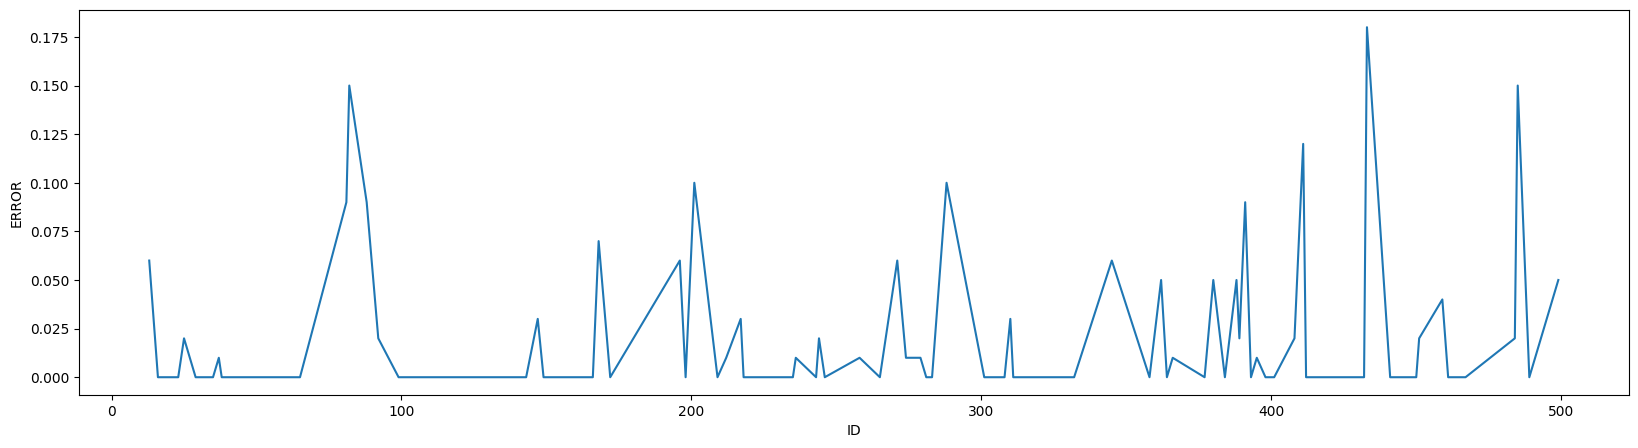

In [86]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x='ID', y='ERROR')
plt.show()

### 레드 와인 퀄리티 예측 데이터

```{attention} 
데이터 설명 : 레드 와인 퀄리티 예측문제 (종속변수 :quality)    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/y_test.csv    
데이터 출처 :https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009(참고, 데이터 수정)     
```  

In [87]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/redwine/y_test.csv")

display(X.head())
display(Y.head())

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,10.6000,0.4400,0.6800,4.1000,0.1140,6.0000,24.0000,0.9970,3.0600,0.6600,13.4000
1,2,7.0000,0.6000,0.3000,4.5000,0.0680,20.0000,110.0000,0.9991,3.3000,1.1700,10.2000
2,3,8.0000,0.4300,0.3600,2.3000,0.0750,10.0000,48.0000,0.9976,3.3400,0.4600,9.4000
3,4,7.9000,0.5300,0.2400,2.0000,0.0720,15.0000,105.0000,0.9960,3.2700,0.5400,9.4000
4,5,8.0000,0.4500,0.2300,2.2000,0.0940,16.0000,29.0000,0.9962,3.2100,0.4900,10.2000


,ID,quality
0,1,6
1,2,5
2,3,5
3,4,6
4,5,6


#### EDA

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1279 non-null   int64  
 1   fixed acidity         1279 non-null   float64
 2   volatile acidity      1279 non-null   float64
 3   citric acid           1279 non-null   float64
 4   residual sugar        1279 non-null   float64
 5   chlorides             1279 non-null   float64
 6   free sulfur dioxide   1279 non-null   float64
 7   total sulfur dioxide  1279 non-null   float64
 8   density               1279 non-null   float64
 9   pH                    1279 non-null   float64
 10  sulphates             1279 non-null   float64
 11  alcohol               1279 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 120.0 KB


In [89]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    320 non-null    int64  
 1   fixed acidity         320 non-null    float64
 2   volatile acidity      320 non-null    float64
 3   citric acid           320 non-null    float64
 4   residual sugar        320 non-null    float64
 5   chlorides             320 non-null    float64
 6   free sulfur dioxide   320 non-null    float64
 7   total sulfur dioxide  320 non-null    float64
 8   density               320 non-null    float64
 9   pH                    320 non-null    float64
 10  sulphates             320 non-null    float64
 11  alcohol               320 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 30.1 KB


In [90]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       1279 non-null   int64
 1   quality  1279 non-null   int64
dtypes: int64(2)
memory usage: 20.1 KB


#### 데이터 전처리

In [91]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [92]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
dfX.isna().sum().sum()

0

#### Feature Engineering

In [94]:
dfXY = pd.merge(dfX, Y, on='ID')

In [96]:
dfXY.corr()['quality'].sort_values().tail()

fixed acidity   0.1110
citric acid     0.2150
sulphates       0.2635
alcohol         0.4819
quality         1.0000
Name: quality, dtype: float64

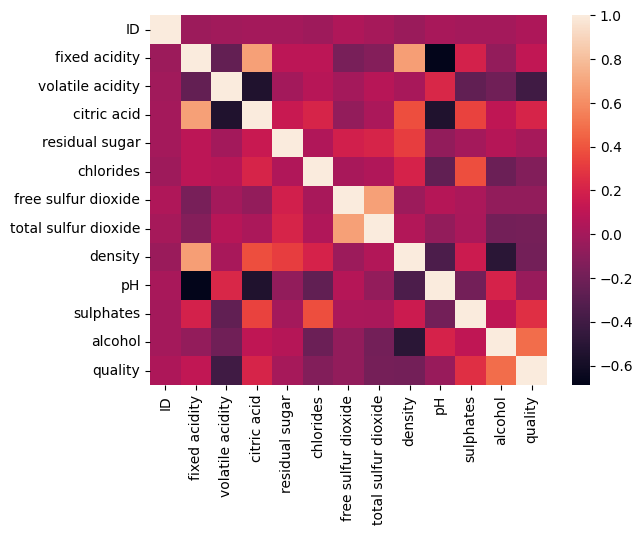

In [98]:
sns.heatmap(data=dfXY.corr())
plt.show()

In [99]:
dfX.columns, Y.columns

(Index(['ID', 'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
       dtype='object'),
 Index(['ID', 'quality'], dtype='object'))

In [100]:
x_features = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', \
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y_feature = 'quality'

#### 모델링

In [101]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [103]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False)

In [104]:
result.sort_values(['Train_R2', 'MSE'], ascending=[False, True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
DecisionTreeRegressor,1.0000,0.0602,0.9398,0.7318,0.5495,0.8554,0.0173,0.1315
XGBRegressor,0.9994,0.4213,0.5781,0.4506,0.4379,0.6713,0.0107,0.1035
RandomForestRegressor,0.9195,0.4878,0.4317,0.3988,0.4455,0.6315,0.0095,0.0974
KNeighborsRegressor,0.3795,0.0966,0.2829,0.7034,0.6401,0.8387,0.0165,0.1283
LinearRegression,0.3518,0.3837,0.0319,0.4799,0.5183,0.6927,0.0113,0.1065


In [105]:
model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2   0.9195
Test_R2    0.4878
MSE        0.3988
MAE        0.4455
RMSE       0.6315
MSLE       0.0095
RMSLE      0.0974
dtype: float64


In [106]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

In [108]:
pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
alcohol,0.2908
volatile acidity,0.1404
sulphates,0.1181
total sulfur dioxide,0.0813
chlorides,0.0639
fixed acidity,0.0548
citric acid,0.0528
free sulfur dioxide,0.0522
density,0.0493
residual sugar,0.0492


#### 실제값과 비교

In [109]:
Y_predict = pd.read_csv('submission.csv')

In [110]:
result = pd.merge(Y_actual, Y_predict, on='ID')
result.head()

,ID,quality_x,quality_y
0,0,6,5.7900
1,7,6,6.2900
2,12,5,5.0300
3,13,3,3.8800
4,25,6,5.2600


In [111]:
result['ERROR'] = (result['quality_x'] - result['quality_y']) ** 2

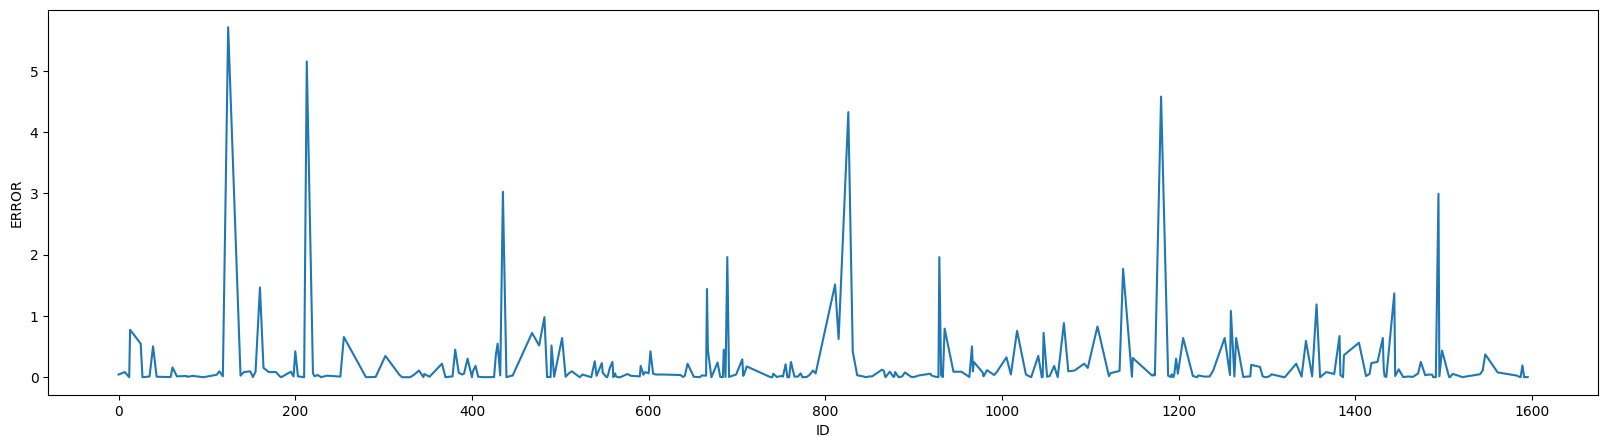

In [112]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x='ID', y='ERROR')
plt.show()

### 현대 차량 가격 분류문제 데이터

```{attention}     
데이터 설명 : 현대 차량가격 분류문제 (종속변수 :price)    
x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/x_train.csv    
y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/y_train.csv  
x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/x_test.csv   
x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/y_test.csv    
데이터 출처 :https://www.kaggle.com/mysarahmadbhat/hyundai-used-car-listing(참고, 데이터 수정) 
```  

In [6]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
#데이터 로드
X = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/x_train.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/y_train.csv")
X_submission = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/x_test.csv")
Y_actual = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/hyundai/y_test.csv")

display(X.head())
display(Y.head())

,ID,model,year,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,0,I30,2019,Manual,21,Petrol,150,34.0000,2.0000
1,1,Santa Fe,2018,Semi-Auto,10500,Diesel,145,39.8000,2.2000
2,2,Tucson,2017,Manual,29968,Diesel,30,61.7000,1.7000
3,3,Kona,2018,Manual,27317,Petrol,145,52.3000,1.0000
4,4,Tucson,2018,Semi-Auto,31459,Diesel,145,57.7000,1.7000


,ID,price
0,0,23995
1,1,28490
2,2,13251
3,3,14990
4,4,17591


#### EDA

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3888 non-null   int64  
 1   model         3888 non-null   object 
 2   year          3888 non-null   int64  
 3   transmission  3888 non-null   object 
 4   mileage       3888 non-null   int64  
 5   fuelType      3888 non-null   object 
 6   tax(£)        3888 non-null   int64  
 7   mpg           3888 non-null   float64
 8   engineSize    3888 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 273.5+ KB


In [8]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            972 non-null    int64  
 1   model         972 non-null    object 
 2   year          972 non-null    int64  
 3   transmission  972 non-null    object 
 4   mileage       972 non-null    int64  
 5   fuelType      972 non-null    object 
 6   tax(£)        972 non-null    int64  
 7   mpg           972 non-null    float64
 8   engineSize    972 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 68.5+ KB


In [9]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      3888 non-null   int64
 1   price   3888 non-null   int64
dtypes: int64(2)
memory usage: 60.9 KB


#### 데이터 전처리

In [28]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

In [34]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      4860 non-null   int64  
 1   model                   4860 non-null   int32  
 2   year                    4860 non-null   int64  
 3   mileage                 4860 non-null   int64  
 4   tax(£)                  4860 non-null   int64  
 5   mpg                     4860 non-null   float64
 6   engineSize              4860 non-null   float64
 7   transmission_Automatic  4860 non-null   bool   
 8   transmission_Manual     4860 non-null   bool   
 9   transmission_Other      4860 non-null   bool   
 10  transmission_Semi-Auto  4860 non-null   bool   
 11  fuelType_Diesel         4860 non-null   bool   
 12  fuelType_Hybrid         4860 non-null   bool   
 13  fuelType_Other          4860 non-null   bool   
 14  fuelType_Petrol         4860 non-null   

In [30]:
dfX.isna().sum().sum(), dfX.isnull().sum().sum()

(0, 0)

In [31]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} - {dfX[feature].unique()}')
    print('-' * 30)

model - [' I30' ' Santa Fe' ' Tucson' ' Kona' ' Ioniq' ' I10' ' I20' ' I40'
 ' IX20' ' IX35' ' I800' ' Amica' ' Veloster' ' Terracan' ' Getz'
 ' Accent']
------------------------------
transmission - ['Manual' 'Semi-Auto' 'Automatic' 'Other']
------------------------------
fuelType - ['Petrol' 'Diesel' 'Hybrid' 'Other']
------------------------------


In [32]:
dfX['model'] = LabelEncoder().fit_transform(dfX['model'])

In [33]:
features = ['transmission', 'fuelType']

temp = dfX.drop(columns=features)
temp_list = [temp]

for feature in features:
    temp = pd.get_dummies(dfX[feature], prefix=feature)
    temp_list.append(temp)
    
dfX = pd.concat(temp_list, axis=1)

#### Feature Engineering

In [10]:
dfXY = pd.merge(X, Y, on='ID')

In [11]:
dfXY.corr(numeric_only=True)['price'].sort_values().head()

mileage      -0.4554
mpg          -0.3363
ID           -0.0074
tax(£)        0.3154
engineSize    0.5340
Name: price, dtype: float64

In [13]:
for feature in dfXY.select_dtypes(include='object').columns:
    print(f'{feature} - {dfXY[feature].value_counts()}')
    print('-' * 30)

model - model
 Tucson      1049
 I10          863
 I30          432
 I20          398
 Kona         266
 Ioniq        228
 Santa Fe     193
 IX20         157
 I40          105
 I800          97
 IX35          89
 Getz           5
 Veloster       3
 Amica          1
 Terracan       1
 Accent         1
Name: count, dtype: int64
------------------------------
transmission - transmission
Manual       2880
Automatic     532
Semi-Auto     474
Other           2
Name: count, dtype: int64
------------------------------
fuelType - fuelType
Petrol    2320
Diesel    1291
Hybrid     277
Name: count, dtype: int64
------------------------------


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for feature in dfXY.select_dtypes(include='object').columns:
    model = ols(formula=f'price ~ C({feature})', data=dfXY).fit()
    r = sm.stats.anova_lm(model, typ=1)
    print(r)
    print('-' * 30)

                 df              sum_sq            mean_sq        F  PR(>F)
C(model)    15.0000 79,777,755,884.7745 5,318,517,058.9850 377.6333  0.0000
Residual 3,872.0000 54,532,528,793.4783    14,083,814.2545      NaN     NaN
------------------------------
                        df               sum_sq             mean_sq        F   
C(transmission)     3.0000  33,284,489,761.3497 11,094,829,920.4499 426.5477  \
Residual        3,884.0000 101,025,794,916.9037     26,010,760.7922      NaN   

                 PR(>F)  
C(transmission)  0.0000  
Residual            NaN  
------------------------------
                    df               sum_sq             mean_sq        F   
C(fuelType)     2.0000  23,105,181,182.3901 11,552,590,591.1950 403.5949  \
Residual    3,885.0000 111,205,103,495.8628     28,624,222.2641      NaN   

             PR(>F)  
C(fuelType)  0.0000  
Residual        NaN  
------------------------------


In [35]:
dfXY = pd.merge(dfX, Y, on='ID')

In [36]:
dfXY.corr()['price'].sort_values(ascending=True)

transmission_Manual      -0.4811
mileage                  -0.4554
fuelType_Petrol          -0.3693
mpg                      -0.3363
ID                       -0.0074
transmission_Other        0.0077
fuelType_Diesel           0.2196
transmission_Automatic    0.2300
fuelType_Hybrid           0.3022
tax(£)                    0.3154
transmission_Semi-Auto    0.4022
engineSize                0.5340
year                      0.5874
model                     0.6141
price                     1.0000
fuelType_Other               NaN
Name: price, dtype: float64

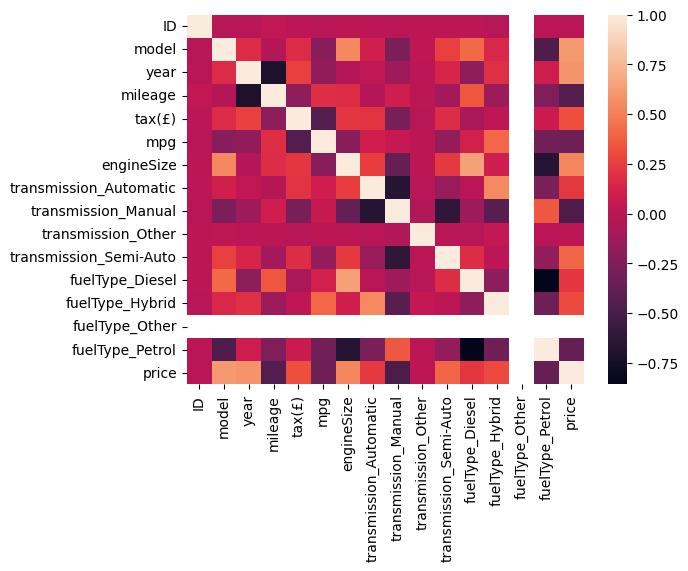

In [37]:
sns.heatmap(dfXY.corr())
plt.show()

In [38]:
dfX.columns, Y.columns

(Index(['ID', 'model', 'year', 'mileage', 'tax(£)', 'mpg', 'engineSize',
        'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
        'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
        'fuelType_Other', 'fuelType_Petrol'],
       dtype='object'),
 Index(['ID', 'price'], dtype='object'))

In [39]:
x_features = ['model', 'year', 'mileage', 'tax(£)', 'mpg', 'engineSize','transmission_Automatic', \
              'transmission_Manual', 'transmission_Other','transmission_Semi-Auto', 'fuelType_Diesel', \
              'fuelType_Hybrid','fuelType_Other', 'fuelType_Petrol']
y_feature = 'price'

#### 모델링

In [40]:
XF, X_submissionF, YF = get_regression_model_data(dfX, Y, len(X), x_features, y_feature, is_regularized=False)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=1234)

In [42]:
result = compare_regression_model(xtrain, xtest, ytrain, ytest, is_regularized=False)

In [45]:
result.sort_values(['MSE'], ascending=[True])

,Train_R2,Test_R2,DIFF,MSE,MAE,RMSE,MSLE,RMSLE
XGBRegressor,0.9919,0.9502,0.0418,"1,780,089.6366",877.0165,"1,334.2000",0.0125,0.1118
RandomForestRegressor,0.9930,0.9426,0.0504,"2,051,492.2354",904.4975,"1,432.3031",0.0155,0.1247
DecisionTreeRegressor,0.9996,0.9227,0.0769,"2,761,108.1512","1,049.1410","1,661.6583",0.0198,0.1407
LinearRegression,0.8173,0.8096,0.0077,"6,800,942.2414","1,772.5570","2,607.8616",0.4633,0.6807
KNeighborsRegressor,0.4847,0.2914,0.1933,"25,313,721.9102","3,869.3381","5,031.2744",0.1505,0.3880


In [46]:
model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
print(get_regression_model_score(model, xtrain, xtest, ytrain, ytest))

Train_R2           0.9919
Test_R2            0.9502
MSE        1,780,089.6366
MAE              877.0165
RMSE           1,334.2000
MSLE               0.0125
RMSLE              0.1118
dtype: float64


In [47]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], y_feature: Y_pred})
submission.to_csv('./submission.csv', index=False)

#### 실제값과 비교

In [48]:
Y_predict = pd.read_csv('submission.csv')

In [49]:
result = pd.merge(Y_actual, Y_predict, on='ID')
result.head()

,ID,price_x,price_y
0,21,8795,"8,590.4790"
1,28,4395,"4,619.6025"
2,33,35985,"36,181.9020"
3,38,12995,"13,131.3940"
4,45,7698,"8,000.0100"


In [59]:
result['ERROR'] = (result['price_x'] - result['price_y'])

In [60]:
print(f'MSE   : {mse(Y_actual[y_feature], Y_predict[y_feature]):,.2f}')
print(f'MAE   : {mae(Y_actual[y_feature], Y_predict[y_feature]):,.2f}')
print(f'RMSE  : {np.sqrt(mse(Y_actual[y_feature], Y_predict[y_feature])):,.2f}')
print(f'MSLE  : {msle(Y_actual[y_feature], Y_predict[y_feature]):,.2f}')
print(f'RMSLE : {np.sqrt(msle(Y_actual[y_feature], Y_predict[y_feature])):,.2f}')

MSE   : 8,008,391.11
MAE   : 657.94
RMSE  : 2,829.91
MSLE  : 0.02
RMSLE : 0.13


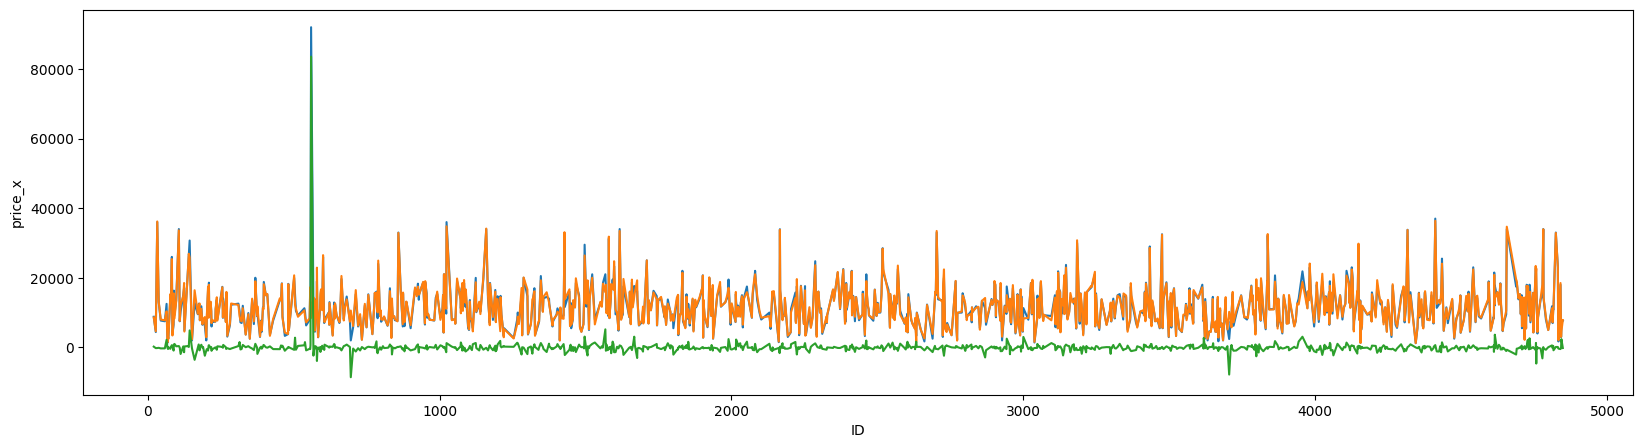

In [61]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x='ID', y='price_x')
sns.lineplot(data=result, x='ID', y='price_y')
sns.lineplot(data=result, x='ID', y='ERROR')
plt.show()